# Project Ptah
I named it after the Egyptian God of Wisdom because Project Athena was taken by MIT

I will pull patient data out of the study CLINTEK 010 that is being analyzed by the folks at FTLS

I will then try to do some feature engineering ending up ploting and charting data to discover logical features to cluster by (if there seem to be any)

In [1]:
import pandas as pd
import pyodbc
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
conn = pyodbc.connect('DRIVER={SQL Server};Server=10.10.10.203;Database=sfls1_data;user=CDR_IIS_Account;password=eclinical.1;Trusted_Connection=false')
sql = 'select * from [Clintek_010].[DM]'
clintek10DMdf = pd.read_sql(sql, conn)

In [3]:
sql = 'select * from [Clintek_010].[TS]'
clintek10studyinfoDF = pd.read_sql(sql, conn)

In [4]:
allsubjectsdf = clintek10DMdf[~clintek10DMdf.ARMCD.eq('SCRFAIL')]
subjFeaturesds = allsubjectsdf.drop(columns=['STUDYID','DOMAIN','SUBJID','ETHNIC','ACTARMCD','ACTARM', 'AGEU'])


In [5]:
subjFeaturesds.shape
#.info()

(267, 17)

In [6]:
sql = """
select v.* from [Clintek_010].VS V
    join [Clintek_010].DM D on D.USUBJID = V.USUBJID
where
    D.ARMCD != 'SCRFAIL'
"""
vitalsdf = pd.read_sql(sql, conn)

In [7]:
vitalsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21437 entries, 0 to 21436
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STUDYID   21437 non-null  object 
 1   DOMAIN    21437 non-null  object 
 2   USUBJID   21437 non-null  object 
 3   VSSEQ     21437 non-null  int64  
 4   VSSPID    21437 non-null  object 
 5   VSTESTCD  21437 non-null  object 
 6   VSTEST    21437 non-null  object 
 7   VSORRES   21254 non-null  object 
 8   VSORRESU  21254 non-null  object 
 9   VSSTRESC  21254 non-null  object 
 10  VSSTRESN  21254 non-null  float64
 11  VSSTRESU  21254 non-null  object 
 12  VSSTAT    183 non-null    object 
 13  VSMETHOD  20804 non-null  object 
 14  VSBLFL    2320 non-null   object 
 15  VSDRVFL   2868 non-null   object 
 16  VISITNUM  21437 non-null  float64
 17  VISIT     21437 non-null  object 
 18  EPOCH     21245 non-null  object 
 19  VSDTC     21256 non-null  object 
 20  VSDY      21256 non-null  fl

In [8]:
vitalsdf.VSTESTCD.unique()

array(['TEMP', 'WEIGHT', 'BSA', 'DIABP', 'HEIGHT', 'HR', 'OXYSAT', 'RESP',
       'SYSBP', 'VSALL'], dtype=object)

In [9]:
# I hate this warning. I try to work around it, but it just keeps going unless explicitly shut off
pd.set_option('mode.chained_assignment', None)

In [10]:
patientheightdf = vitalsdf[vitalsdf.VSTESTCD.eq('HEIGHT')]
patientheightdf.loc[:,['VSDTC']] = pd.to_datetime(patientheightdf['VSDTC'])
patientheightdf.loc[:,['VSORRES']] = pd.to_numeric(patientheightdf['VSORRES'])

patientweightdf = vitalsdf[vitalsdf.VSTESTCD.eq('WEIGHT')]
patientweightdf.loc[:,['VSDTC']] = pd.to_datetime(patientweightdf['VSDTC'])
patientweightdf.loc[:,['VSORRES']] = pd.to_numeric(patientweightdf['VSORRES'])

patientbsadf = vitalsdf[vitalsdf.VSTESTCD.eq('BSA')]
patientbsadf.loc[:,['VSDTC']] = pd.to_datetime(patientbsadf['VSDTC'])
patientbsadf.loc[:,['VSORRES']] = pd.to_numeric(patientbsadf['VSORRES'])

patientdiabpdf = vitalsdf[vitalsdf.VSTESTCD.eq('DIABP')]
patientdiabpdf.loc[:,['VSDTC']] = pd.to_datetime(patientdiabpdf['VSDTC'])
patientdiabpdf.loc[:,['VSORRES']] = pd.to_numeric(patientdiabpdf['VSORRES'])

patienthrdf = vitalsdf[vitalsdf.VSTESTCD.eq('HR')]
patienthrdf.loc[:,['VSDTC']] = pd.to_datetime(patienthrdf['VSDTC'])
patienthrdf.loc[:,['VSORRES']] = pd.to_numeric(patienthrdf['VSORRES'])

patientoxtysatdf = vitalsdf[vitalsdf.VSTESTCD.eq('OXYSAT')]
patientoxtysatdf.loc[:,['VSDTC']] = pd.to_datetime(patientoxtysatdf['VSDTC'])
patientoxtysatdf.loc[:,['VSORRES']] = pd.to_numeric(patientoxtysatdf['VSORRES'])

patientrespdf = vitalsdf[vitalsdf.VSTESTCD.eq('RESP')]
patientrespdf.loc[:,['VSDTC']] = pd.to_datetime(patientrespdf['VSDTC'])
patientrespdf.loc[:,['VSORRES']] = pd.to_numeric(patientrespdf['VSORRES'])

patientsysbpdf = vitalsdf[vitalsdf.VSTESTCD.eq('SYSBP')]
patientsysbpdf.loc[:,['VSDTC']] = pd.to_datetime(patientsysbpdf['VSDTC'])
patientsysbpdf.loc[:,['VSORRES']] = pd.to_numeric(patientsysbpdf['VSORRES'])

patienttempdf = vitalsdf[vitalsdf.VSTESTCD.eq('TEMP')]
patienttempdf.loc[:,['VSDTC']] = pd.to_datetime(patienttempdf['VSDTC'])
#patienttempdf.loc[:,['VSSTRESC']] = pd.to_numeric(patientsysbpdf['VSSTRESC'])#note different
patienttempdf.loc[:,['VSORRES']] = pd.to_numeric(patienttempdf['VSORRES'])#note different


In [11]:
# how to check for duplicate values
#print(patientheightvalsdf.duplicated(subset=['USUBJID']).any())

## The initial features that we will look into
Demographics type stuff

* age
* race
* sex
* location
* Vital Sign stuff
* heart rate
* Blood pressure
* weight/BMI
* temperature
* respiration/breathing rate
* oxygen saturation
* Other stuff - labs?
* AEs/SAEs - type?

Not sure what makes sense here?

### Create two ARM groups to track patients by

In [12]:
cohort1 = subjFeaturesds[subjFeaturesds.ARM.eq('COHORT 1')]
cohort2 = subjFeaturesds[subjFeaturesds.ARM.eq('COHORT 2')]

## Age represtented in a histogram

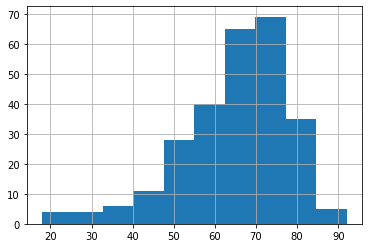

In [13]:
subjFeaturesds.AGE.hist()

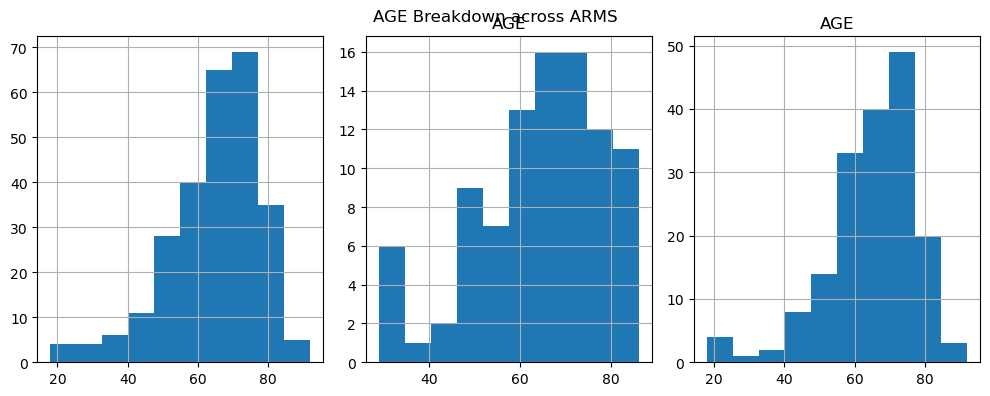

In [14]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
# fig1.set_size_inches(12, 6)
fig1.dpi = 100
fig1.suptitle('AGE Breakdown across ARMS')
#ax1.title='Study Level'
subjFeaturesds.AGE.hist(ax=ax1)
#ax2.title='COHORT 1'
cohort1.hist(ax=ax2)
#ax3.title='COHORT 2'
cohort2.hist(ax=ax3)
# plt.plot()
plt.tight_layout()

## Race Analysis

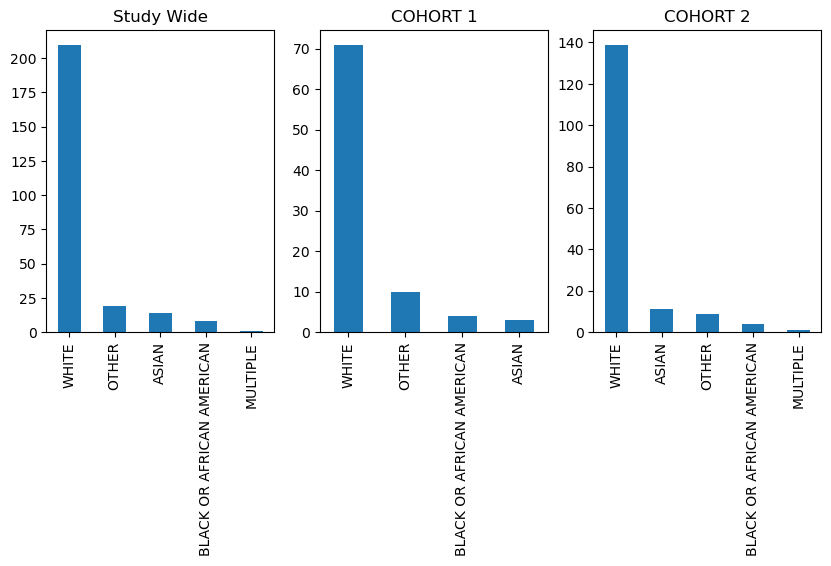

In [15]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
# fig1.set_size_inches(12, 6)
fig1.dpi = 100
#fig1.suptitle('Race Breakdown across ARMS')

ax1.set_title('Study Wide')
ax2.set_title('COHORT 1')
ax3.set_title('COHORT 2')

subjFeaturesds.RACE.value_counts().plot(kind='bar',ax=ax1)
cohort1.RACE.value_counts().plot(kind='bar',ax=ax2)
cohort2.RACE.value_counts().plot(kind='bar',ax=ax3)


## Patient Gender analysis

<function matplotlib.pyplot.show(*args, **kw)>

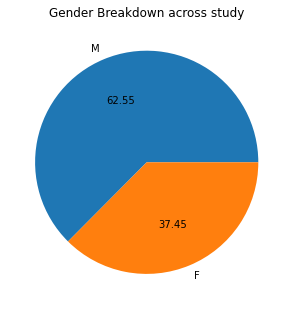

In [16]:
sex_counts = subjFeaturesds.SEX.value_counts()
plt.figure(figsize=(5,9))
plt.title('Gender Breakdown across study')
plt.pie(sex_counts, labels=sex_counts.index, autopct='%.2f')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

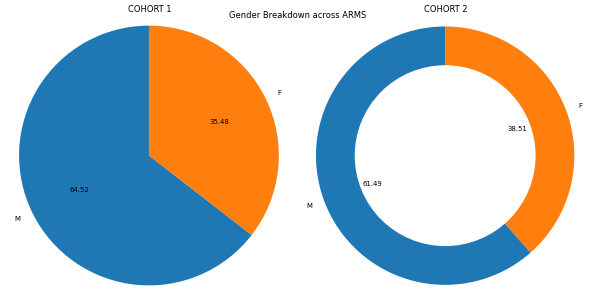

In [17]:
vccorhort1sex = cohort1.SEX.value_counts()
vccorhort2sex = cohort2.SEX.value_counts()

fig1, (ax1, ax2) = plt.subplots(1, 2)
fig1.set_size_inches(12, 6)
fig1.dpi = 50
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


fig1.suptitle('Gender Breakdown across ARMS')
ax1.pie(vccorhort1sex, labels=vccorhort1sex.index, autopct='%.2f', startangle=90)
ax1.set_title('COHORT 1')
ax2.pie(vccorhort2sex, labels=vccorhort2sex.index, autopct='%.2f', startangle=90)
ax2.set_title('COHORT 2')
plt.tight_layout()
ax1.axis('equal')  
ax2.axis('equal')  
plt.show

## Patients by country

In [18]:
countcountries = subjFeaturesds.COUNTRY.value_counts()

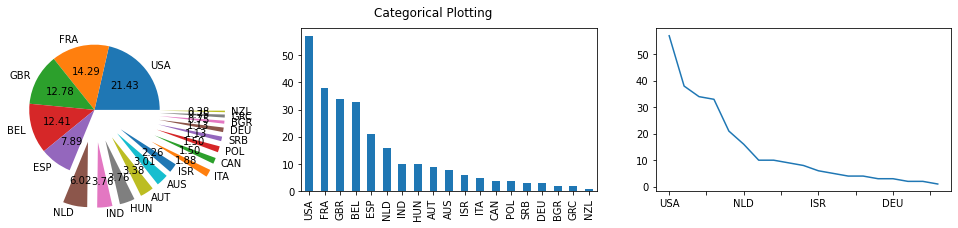

In [19]:
plt.figure(figsize=(18, 3))
plt.subplot(131)
explode = (0,0,0,0,0,0.5,0.5,0.5,0.5,0.5,0.5,1,1,1,1,1,1,1,1)
plt.pie(countcountries, labels=countcountries.index, autopct='%.2f', explode=explode)
plt.subplot(132)
countcountries.plot.bar()
plt.subplot(133)
countcountries.plot()
plt.suptitle('Categorical Plotting')
plt.show()

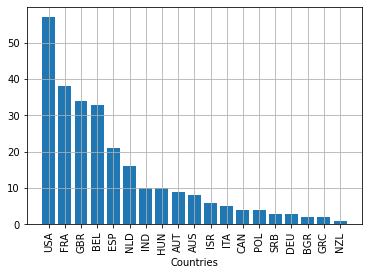

In [20]:
plt.bar(countcountries.index, countcountries)
plt.xticks(countcountries.index, rotation='vertical')
plt.xlabel('Countries')
plt.grid()
plt.show()

### Begin Vital Signs analysis

### Weight / Weight Loss

In [21]:
# lets break out the patients by cohort1 and cohort2 even farther
print('There are ' + str(cohort1.USUBJID.count()) + ' patients in COHORT 1.')
print('There are ' + str(cohort2.USUBJID.count()) + ' patients in COHORT 2.')
tenRandomCohort1 = cohort1.sample(n=10)
tenRandomCohort2 = cohort2.sample(n=10)

There are 93 patients in COHORT 1.
There are 174 patients in COHORT 2.


In [22]:
patientweightdf.head()

STUDYID DOMAIN               USUBJID  VSSEQ       VSSPID VSTESTCD  \
7   CLINTEK-010     VS  CLINTEK-010-0074-007     45  VS-772589-0   WEIGHT   
8   CLINTEK-010     VS  CLINTEK-010-0074-007     46  VS-772604-0   WEIGHT   
9   CLINTEK-010     VS  CLINTEK-010-0074-007     47  VS-772615-0   WEIGHT   
10  CLINTEK-010     VS  CLINTEK-010-0074-007     48  VS-772609-0   WEIGHT   
11  CLINTEK-010     VS  CLINTEK-010-0074-007     49  VS-824710-0   WEIGHT   

    VSTEST  VSORRES VSORRESU VSSTRESC  ...  VSSTRESU VSSTAT     VSMETHOD  \
7   Weight     80.2       kg     80.2  ...        kg   None  Dubois 1916   
8   Weight     80.4       kg     80.4  ...        kg   None  Dubois 1916   
9   Weight     77.7       kg     77.7  ...        kg   None  Dubois 1916   
10  Weight     80.6       kg     80.6  ...        kg   None  Dubois 1916   
11  Weight     79.7       kg     79.7  ...        kg   None  Dubois 1916   

   VSBLFL VSDRVFL VISITNUM                VISIT      EPOCH      VSDTC  VSDY  
7    None    None      2.0  Screening - Visit 2  SCREENING 2015-03-03  -3.0  
8       Y    None      3.0                 C1D1  TREATMENT 2015-03-06   1.0  
9    None    None      5.0                 C1D8  TREATMENT 2015-03-12   7.0  
10   None    None      6.0                C1D15  TREATMENT 2015-03-20  15.0  
11   None    None      8.0                 C2D1  TREATMENT 2015-04-03  29.0  

[5 rows x 21 columns]

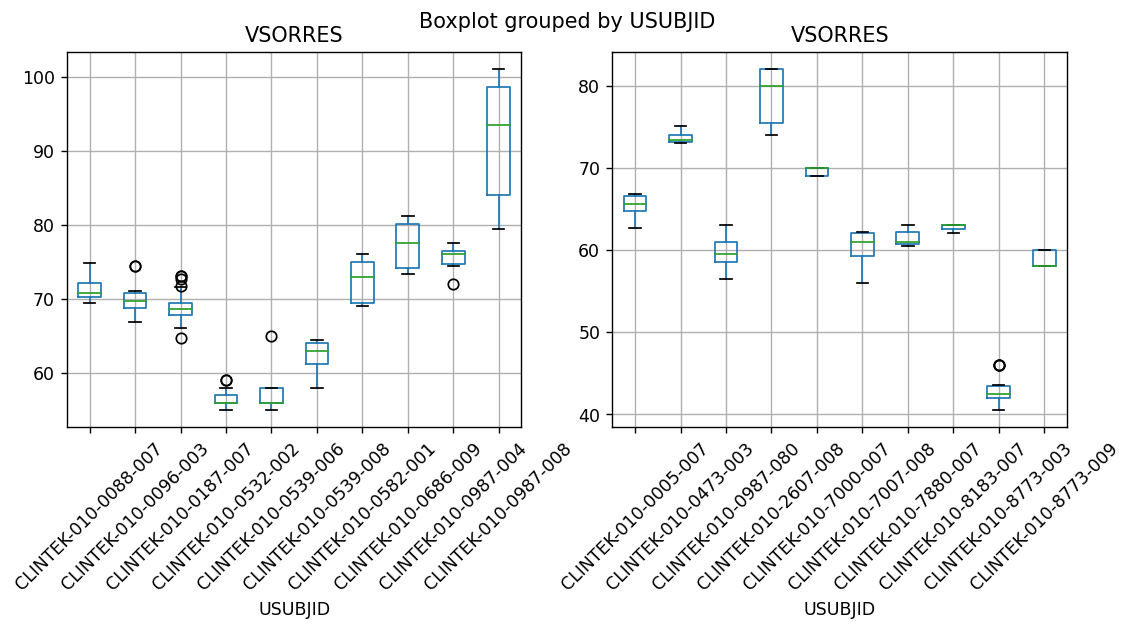

In [23]:
# patientweightdf.boxplot(column='VSORRES', by='USUBJID')

randomCohort1Weight = patientweightdf[patientweightdf['USUBJID'].isin(tenRandomCohort1['USUBJID'])]
randomCohort2Weight = patientweightdf[patientweightdf['USUBJID'].isin(tenRandomCohort2['USUBJID'])]

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig1.dpi=125
# just mess with some stuff
# ax1.set_xlabel('yoo-hoo')
plt.tight_layout()
randomCohort1Weight.boxplot(column='VSORRES', by='USUBJID', rot=45, ax=ax1)
randomCohort2Weight.boxplot(column='VSORRES', by='USUBJID', rot=45, ax=ax2 )

### Any oddities I find in these randomly selected subjects can be plotted individually as below

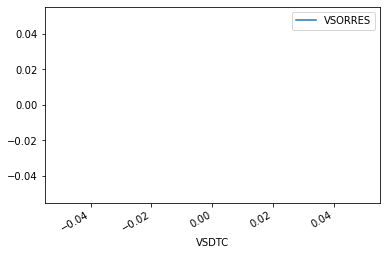

In [24]:
# look at the 'strange' ones
randomCohort2Weight[randomCohort2Weight.USUBJID =='CLINTEK-010-7805-007'].plot(x='VSDTC', y='VSORRES')

### A quick calculation to find out Patient weight change

In [25]:
cols = ['USUBJID','VSORRES']
patientweightdiff = pd.merge( patientweightdf[cols].groupby('USUBJID')['VSORRES'].first().reset_index().rename(columns={'VSORRES': 'BEGIN'}), patientweightdf[cols].groupby('USUBJID')['VSORRES'].last().reset_index().rename(columns={'VSORRES': 'END'}), on='USUBJID')
patientweightdiff['DELTA'] = patientweightdiff['END'] - patientweightdiff['BEGIN']
patientweightdiff['DELTAPCT'] = (patientweightdiff['END'] - patientweightdiff['BEGIN']) / patientweightdiff['BEGIN']

In [26]:
patientweightdiff.head(5)

USUBJID  BEGIN   END  DELTA  DELTAPCT
0  CLINTEK-010-0003-001   52.1  44.1   -8.0 -0.153551
1  CLINTEK-010-0003-002   89.2  79.8   -9.4 -0.105381
2  CLINTEK-010-0003-003   65.3  57.6   -7.7 -0.117917
3  CLINTEK-010-0003-006   59.4  54.9   -4.5 -0.075758
4  CLINTEK-010-0003-007   60.8  56.2   -4.6 -0.075658

In [27]:
display(patientweightdiff.sort_values('DELTA'))

USUBJID  BEGIN    END  DELTA  DELTAPCT
20   CLINTEK-010-0005-088   91.9   59.4  -32.5 -0.353645
202  CLINTEK-010-0987-008  101.0   81.0  -20.0 -0.198020
249  CLINTEK-010-8304-001   82.7   64.3  -18.4 -0.222491
100  CLINTEK-010-0529-008   54.0   36.6  -17.4 -0.322222
75   CLINTEK-010-0308-008   80.5   63.5  -17.0 -0.211180
..                    ...    ...    ...    ...       ...
230  CLINTEK-010-7805-008   99.0  108.0    9.0  0.090909
110  CLINTEK-010-0539-006   55.0   65.0   10.0  0.181818
10   CLINTEK-010-0005-005   80.3   94.9   14.6  0.181818
147  CLINTEK-010-0606-008   79.6   95.9   16.3  0.204774
164  CLINTEK-010-0686-002  124.5  141.7   17.2  0.138153

[267 rows x 5 columns]

#### plot the 10 Random patients

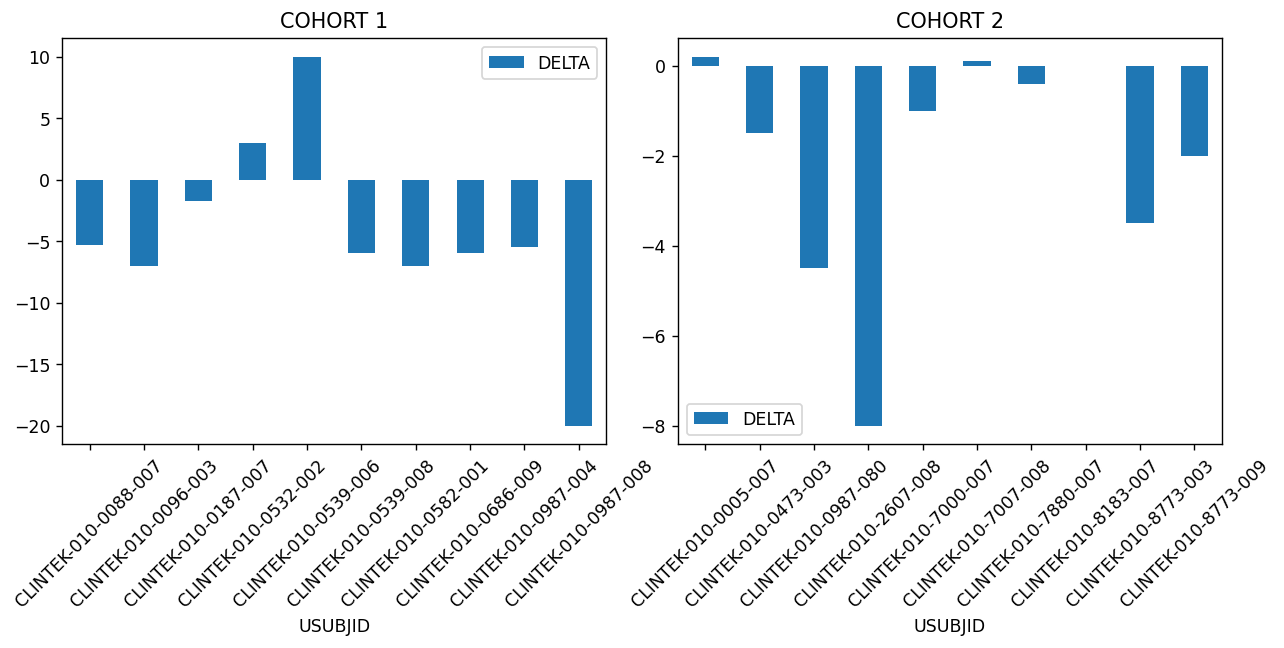

In [28]:
# make the cohort sets
randomCohort1Weightdiff = patientweightdiff[patientweightdiff['USUBJID'].isin(tenRandomCohort1['USUBJID'])]
randomCohort2Weightdiff = patientweightdiff[patientweightdiff['USUBJID'].isin(tenRandomCohort2['USUBJID'])]
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig1.dpi=125
ax1.set_title('COHORT 1')
ax2.set_title('COHORT 2')

plt.tight_layout()
randomCohort1Weightdiff.plot.bar( x='USUBJID',y='DELTA', rot=45, ax=ax1)
randomCohort2Weightdiff.plot.bar( x='USUBJID',y='DELTA', rot=45, ax=ax2 )

### Patient Height

In [29]:
patientheightdf.loc[:,['VSDTC']] = pd.to_datetime(patientheightdf['VSDTC'])
patientheightdf.loc[:,['VSORRES']] = pd.to_numeric(patientheightdf['VSORRES'])

### Heart Rate

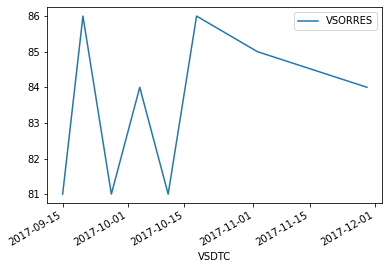

In [30]:
patienthrdf[patienthrdf['USUBJID'] == 'CLINTEK-010-7805-007'].plot(y='VSORRES', x='VSDTC')

In [31]:
# reference
# Blood pressure
# weight/BMI
# temperature
# respiration/breathing rate
# oxygen saturation
# Other stuff - labs?
# AEs/SAEs - type?

### Blood Pressure

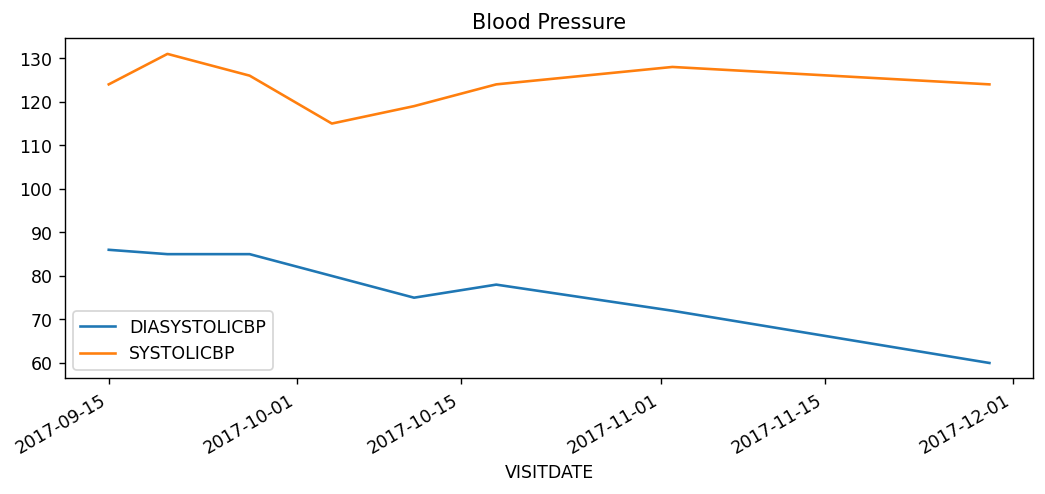

In [32]:
#patientdiabpdf
#patientsysbpdf
# fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
fig1, (ax1) = plt.subplots(1, 1, figsize=(10,4))
fig1.dpi=125
ax1.set_title('Blood Pressure')
patientdiabpdf[patientdiabpdf['USUBJID'] == 'CLINTEK-010-7805-007'].rename(columns={'VSORRES': 'DIASYSTOLICBP', 'VSDTC': 'VISITDATE'}).plot(y='DIASYSTOLICBP', x='VISITDATE', ax=ax1)
patientsysbpdf[patientsysbpdf['USUBJID'] == 'CLINTEK-010-7805-007'].rename(columns={'VSORRES': 'SYSTOLICBP', 'VSDTC': 'VISITDATE'}).plot(y='SYSTOLICBP', x='VISITDATE', ax=ax1)

### Temperature

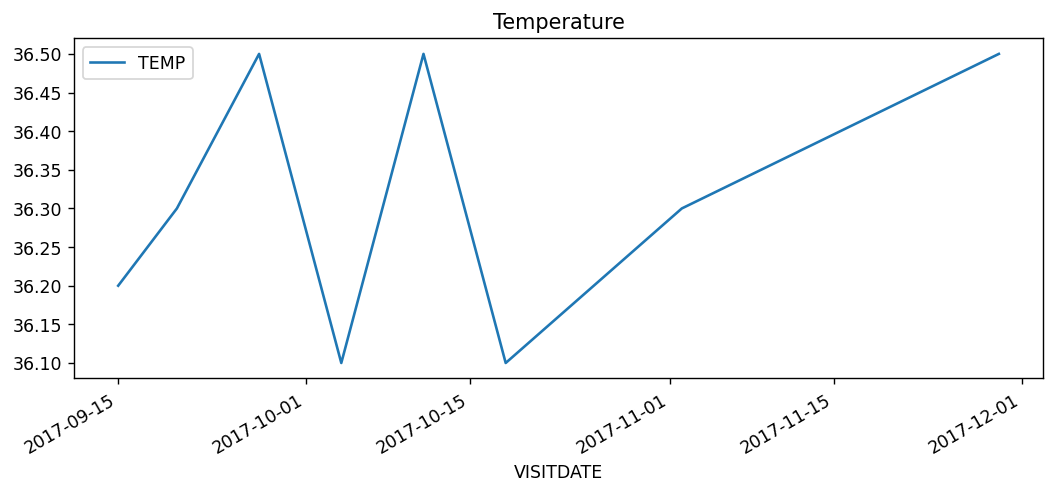

In [33]:
# patienttempdf.head()
fig1, (ax1) = plt.subplots(1, 1, figsize=(10,4))
fig1.dpi=125
ax1.set_title('Temperature')
# patienttempdf[patienttempdf['USUBJID'] == 'CLINTEK-010-7805-007'].rename(columns={'VSORRES': 'TEMP'}).plot(y='TEMP', x='VISIT', ax=ax1)
patienttempdf[patienttempdf['USUBJID'] == 'CLINTEK-010-7805-007'].rename(columns={'VSORRES': 'TEMP', 'VSDTC': 'VISITDATE'}).plot(y='TEMP', x='VISITDATE', ax=ax1)

### 

### Respiration

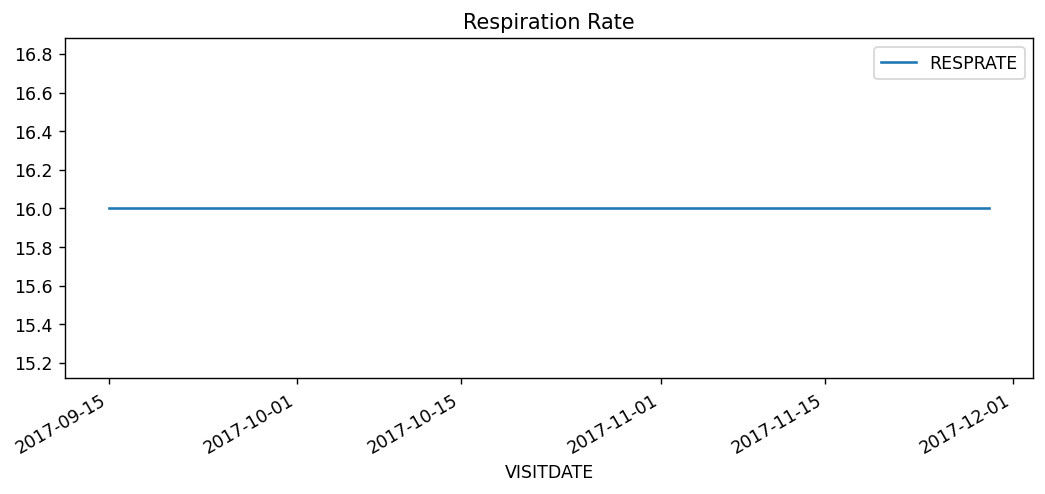

In [34]:
#patientrespdf
fig1, (ax1) = plt.subplots(1, 1, figsize=(10,4))
fig1.dpi=125
ax1.set_title('Respiration Rate')
patientrespdf[patientrespdf['USUBJID'] == 'CLINTEK-010-7805-007'].rename(columns={'VSORRES': 'RESPRATE', 'VSDTC': 'VISITDATE'}).plot(y='RESPRATE', x='VISITDATE', ax=ax1)

### Oxygen Sat

In [35]:
#patientoxtysatdf

if patientoxtysatdf[patientoxtysatdf['USUBJID'] == 'CLINTEK-010-7805-007']['VSORRES'].count() == 1:
    oxyvalue = patientoxtysatdf[patientoxtysatdf['USUBJID'] == 'CLINTEK-010-7805-007']['VSORRES'].to_string(index=False)
    oxydate = patientoxtysatdf[patientoxtysatdf['USUBJID'] == 'CLINTEK-010-7805-007']['VSDTC'].to_string(index=False)
    print('Patient ' + 'CLINTEK-010-7805-007' + ' Oxy Sat. level was ' + str(oxyvalue) + '% on ' + str(oxydate))
else:
    fig1, (ax1) = plt.subplots(1, 1, figsize=(10,4))
    fig1.dpi=125
    ax1.set_title('Respiration Rate')
    patientoxtysatdf[patientoxtysatdf['USUBJID'] == 'CLINTEK-010-7805-007'].rename(columns={'VSORRES': 'OXYSAT', 'VSDTC': 'VISITDATE'}).plot(y='OXYSAT', x='VISITDATE', ax=ax1)

# print(patientoxtysatdf[patientoxtysatdf['USUBJID'] == 'CLINTEK-010-7805-007'])

Patient CLINTEK-010-7805-007 Oxy Sat. level was  99% on 2017-09-20


#### Some random scatter plots

In [36]:
heights = patientheightdf.groupby('USUBJID', as_index=False).VSORRES.mean()
weights = patientweightdf.groupby('USUBJID', as_index=False).VSORRES.mean()

scat1 = pd.merge(heights, weights, on='USUBJID')
scat1.head(5)
# plt.scatter(scat1['HEIGHT'], scat1['WEIGHT'])

USUBJID  VSORRES_x  VSORRES_y
0  CLINTEK-010-0003-001      154.9  49.242857
1  CLINTEK-010-0003-002      152.0  81.040909
2  CLINTEK-010-0003-003      162.6  61.916667
3  CLINTEK-010-0003-006      160.0  56.154545
4  CLINTEK-010-0003-007      165.1  58.450000

In [37]:
def scarrterdfs(df1, df2, ax=None, showArms=False):
    feature1 = df1.groupby('USUBJID', as_index=False).VSORRES.mean()
    feature2 = df2.groupby('USUBJID', as_index=False).VSORRES.mean()
    scatfeatures = pd.merge(feature1, feature2, on='USUBJID')
    if showArms:
        scatfeatures = pd.merge(scatfeatures, allsubjectsdf[['USUBJID', 'ARM']], on='USUBJID')
        # cant use strings on color or size
        scatfeatures.replace(to_replace='COHORT 1', value=1, inplace=True)
        scatfeatures.replace(to_replace='COHORT 2', value=2, inplace=True)
        if ax:
            ax.scatter(scatfeatures['VSORRES_x'], scatfeatures['VSORRES_y'], c=scatfeatures['ARM'])
        else:
            plt.scatter(scatfeatures['VSORRES_x'], scatfeatures['VSORRES_y'], c=scatfeatures['ARM'])
    else:
        if ax:
            ax.scatter(scatfeatures['VSORRES_x'], scatfeatures['VSORRES_y'])
        else:
            plt.scatter(scatfeatures['VSORRES_x'], scatfeatures['VSORRES_y'])

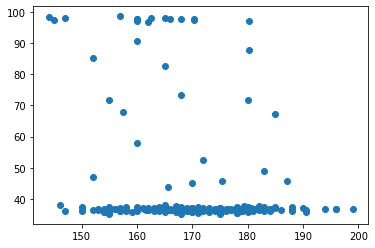

In [38]:
scarrterdfs(patientheightdf, patienttempdf)

In [39]:
def StandardFeatureCompareScatterPlot(df1, df2, plottitle):
    fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    fig1.dpi = 100

    ax1.set_title(plottitle)
    ax2.set_title('By ARM')
    scarrterdfs(df1, df2, ax=ax1)
    scarrterdfs(df1, df2, ax=ax2, showArms=True)

In [40]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

### Height Versus Weight

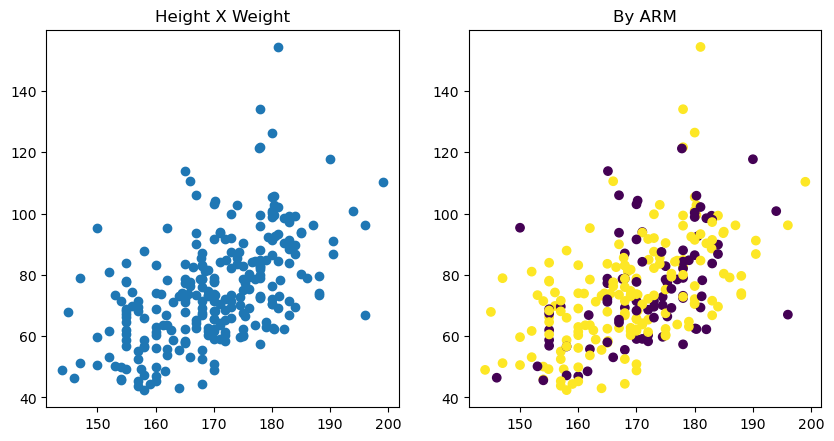

In [41]:
# getting funky withthe scatter plots
StandardFeatureCompareScatterPlot(patientheightdf, patientweightdf, 'Height X Weight')

### Height Versus BSA

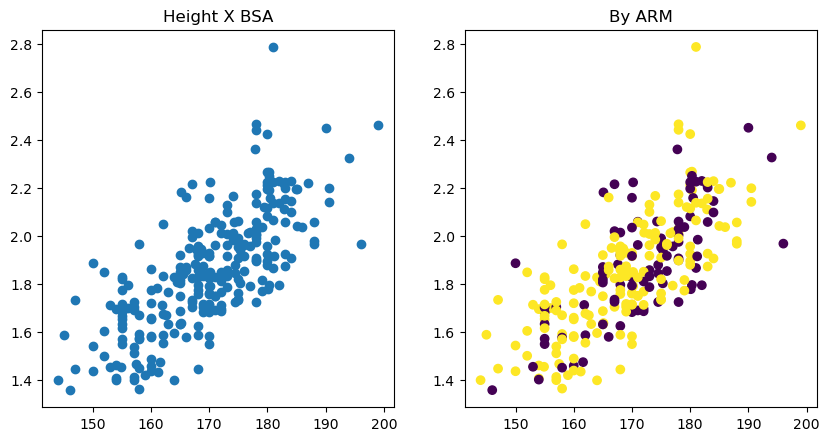

In [42]:
StandardFeatureCompareScatterPlot(patientheightdf, patientbsadf, 'Height X BSA')

### Height Versus DIABP

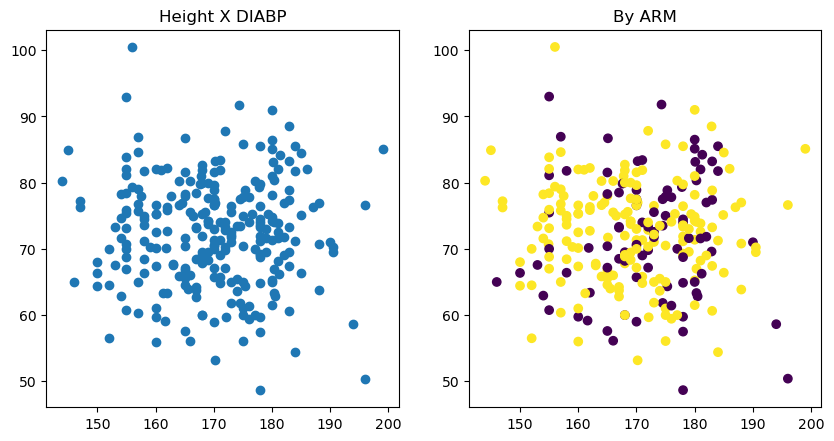

In [43]:
StandardFeatureCompareScatterPlot(patientheightdf, patientdiabpdf, 'Height X DIABP')

### Height Versus Heart Rate

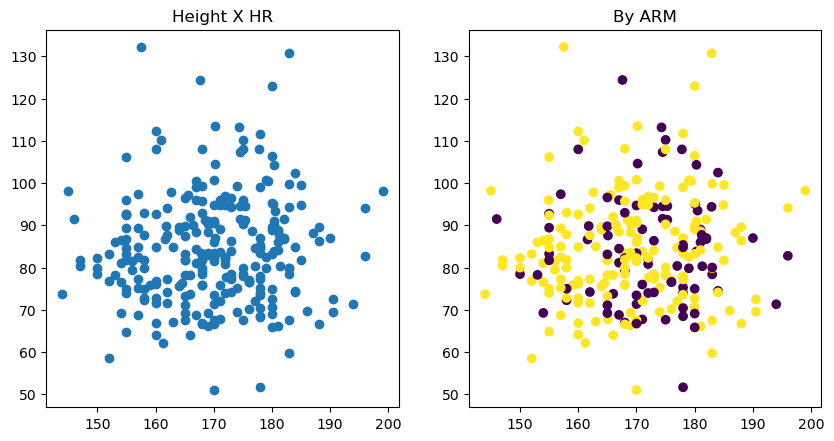

In [44]:
StandardFeatureCompareScatterPlot(patientheightdf, patienthrdf, 'Height X HR')

### Height Versus Oxygen Saturation

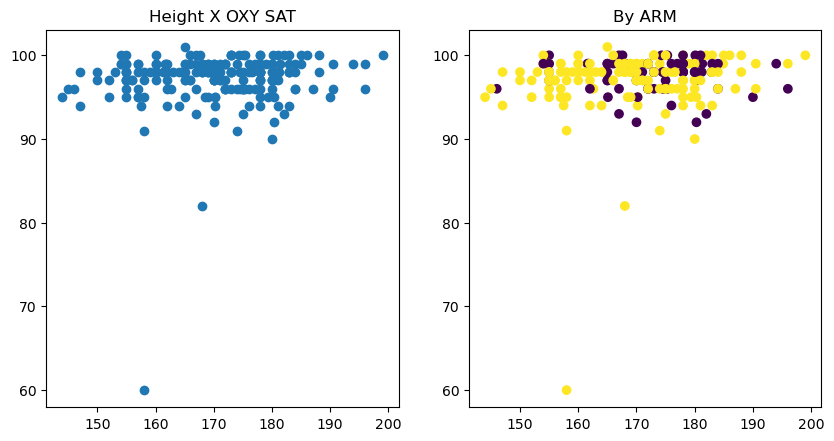

In [45]:
StandardFeatureCompareScatterPlot(patientheightdf, patientoxtysatdf, 'Height X OXY SAT')

### Height Versus Respiration Rate

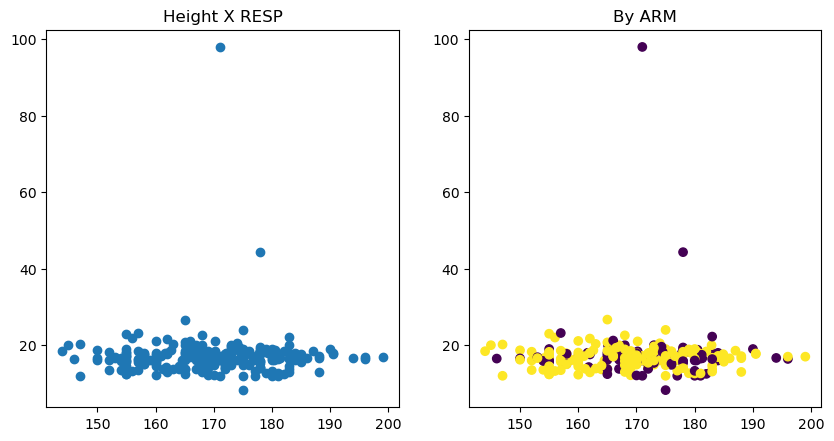

In [46]:
StandardFeatureCompareScatterPlot(patientheightdf, patientrespdf, 'Height X RESP')

### Height Versus SYSBP

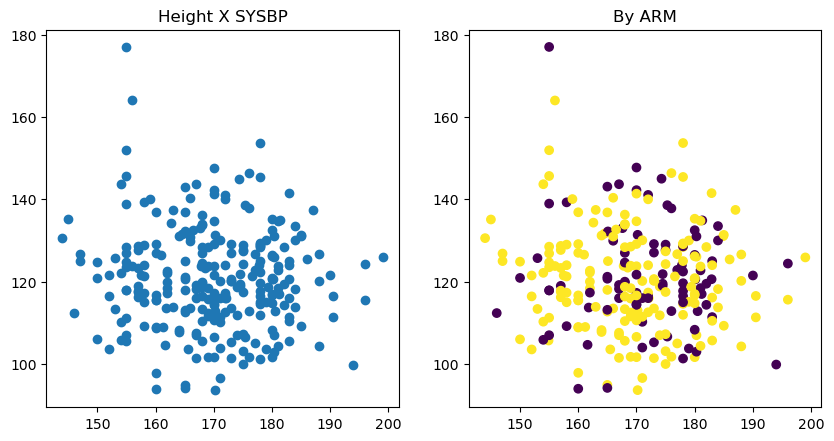

In [47]:
StandardFeatureCompareScatterPlot(patientheightdf, patientsysbpdf, 'Height X SYSBP')

### Height Versus TEMP

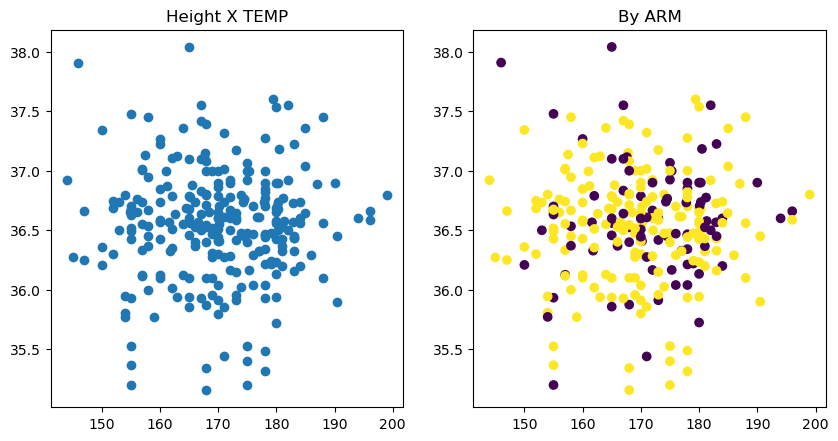

In [48]:
# convert temp F to C for a more uniform plot
tdf = patienttempdf.copy()
for row_label, row in tdf.iterrows():
    if row.VSORRESU == 'F':
        tdf.loc[row_label, 'VSORRES'] = fahr_to_celsius(row['VSORRES'])

StandardFeatureCompareScatterPlot(patientheightdf, tdf, 'Height X TEMP')

### WEIGHT Versus BSA

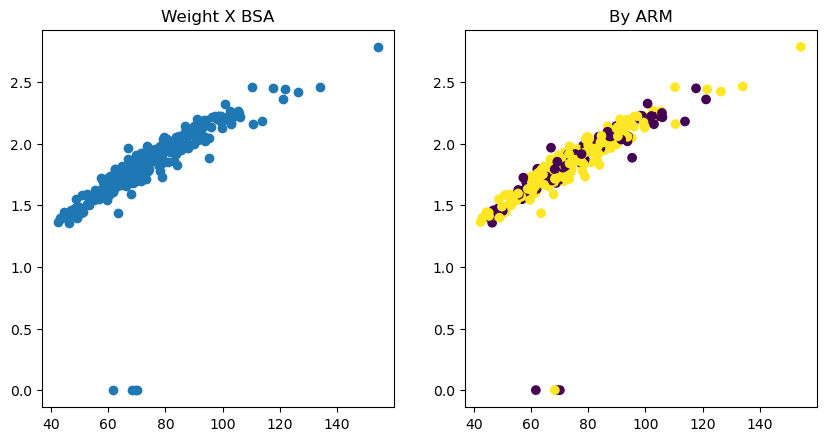

In [49]:
StandardFeatureCompareScatterPlot(patientweightdf, patientbsadf, 'Weight X BSA')

### WEIGHT Versus DIABP

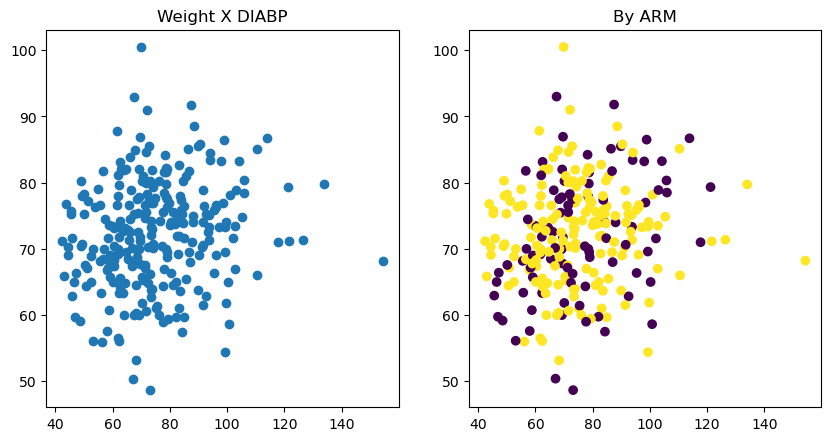

In [50]:
StandardFeatureCompareScatterPlot(patientweightdf, patientdiabpdf, 'Weight X DIABP')

### WEIGHT Versus HR

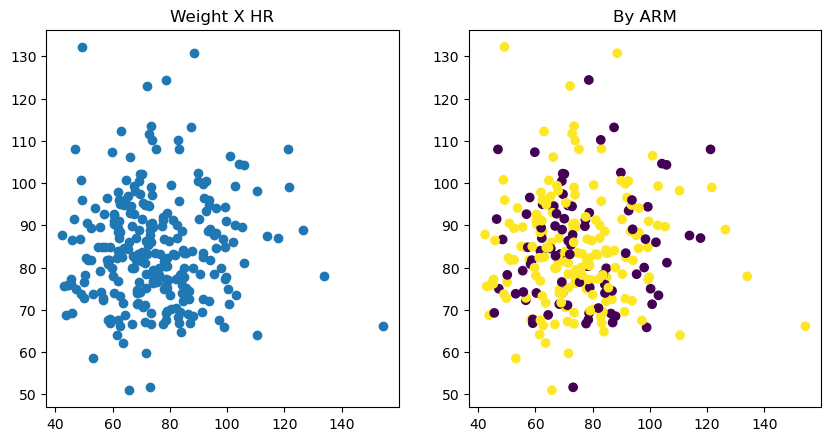

In [51]:
StandardFeatureCompareScatterPlot(patientweightdf, patienthrdf, 'Weight X HR')

### WEIGHT Versus OXYSAT

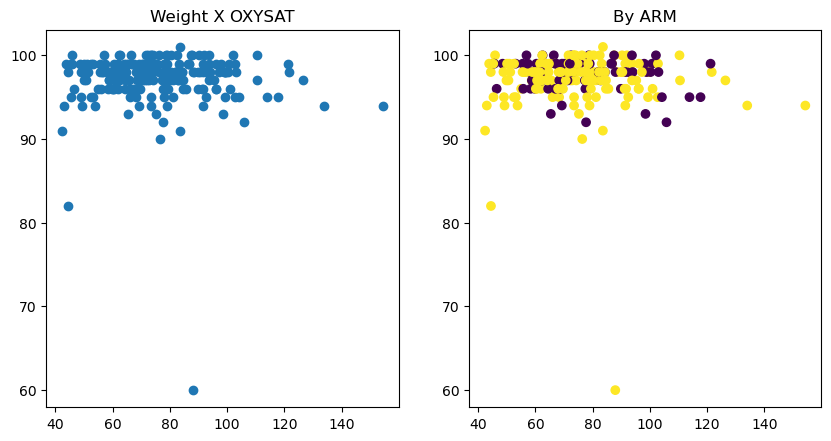

In [52]:
StandardFeatureCompareScatterPlot(patientweightdf, patientoxtysatdf, 'Weight X OXYSAT')

### WEIGHT Versus RESP

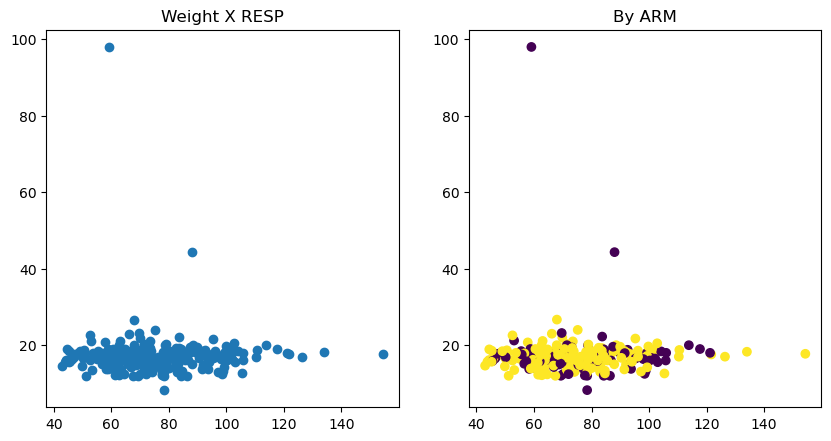

In [53]:
StandardFeatureCompareScatterPlot(patientweightdf, patientrespdf, 'Weight X RESP')

### WEIGHT Versus SYSBP

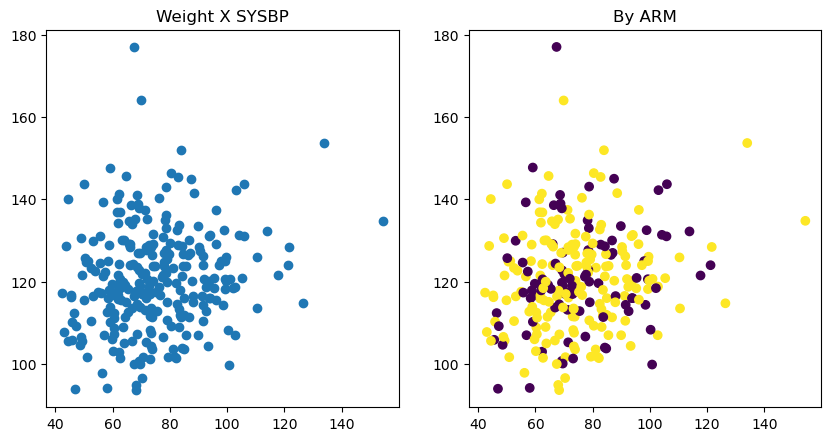

In [54]:
StandardFeatureCompareScatterPlot(patientweightdf, patientsysbpdf, 'Weight X SYSBP')

### WEIGHT Versus TEMP

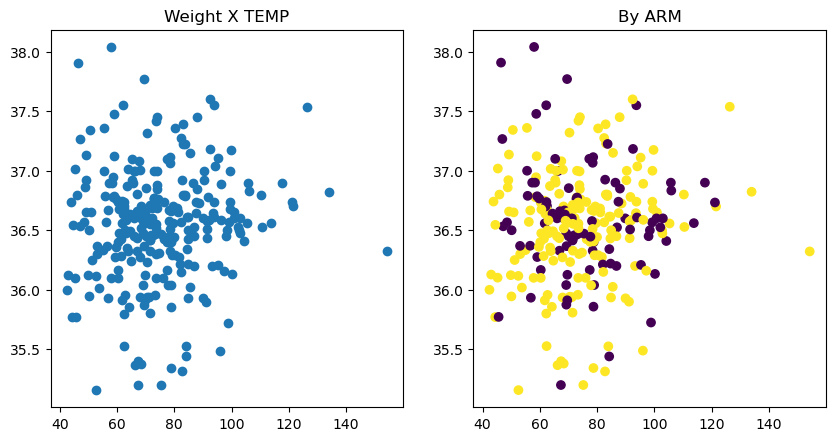

In [55]:
# StandardFeatureCompareScatterPlot(patientweightdf, patienttempdf, 'Weight X TEMP')
StandardFeatureCompareScatterPlot(patientweightdf, tdf, 'Weight X TEMP')

### BSA Versus DIABP

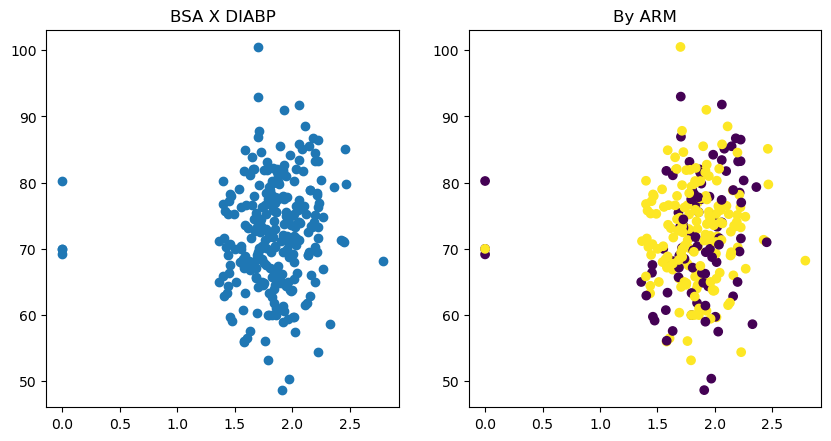

In [56]:
StandardFeatureCompareScatterPlot(patientbsadf, patientdiabpdf, 'BSA X DIABP')

### BSA Versus HR

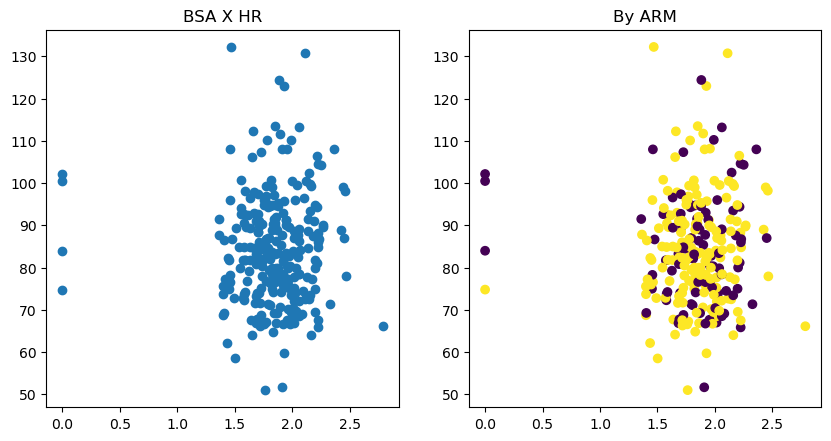

In [57]:
StandardFeatureCompareScatterPlot(patientbsadf, patienthrdf, 'BSA X HR')

### BSA Versus OXYSAT

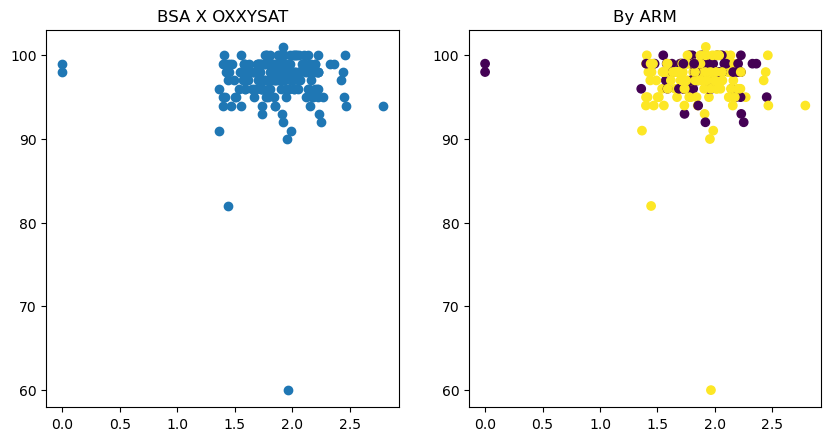

In [58]:
StandardFeatureCompareScatterPlot(patientbsadf, patientoxtysatdf, 'BSA X OXXYSAT')

### BSA Versus RESP

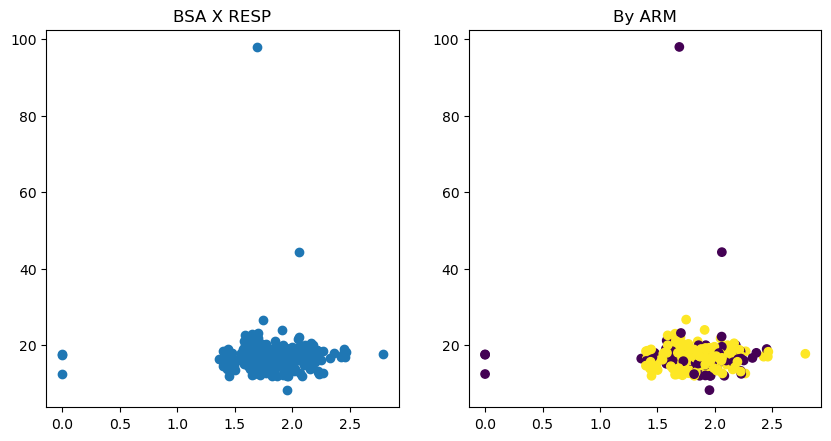

In [59]:
StandardFeatureCompareScatterPlot(patientbsadf, patientrespdf, 'BSA X RESP')

### BSA Versus SYSBP

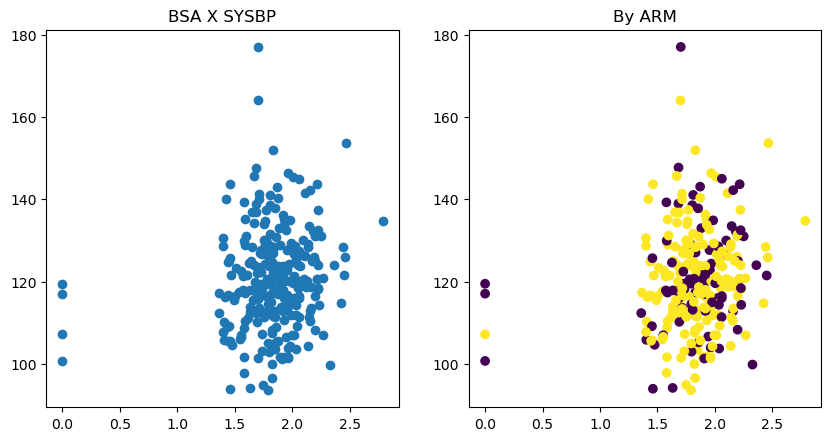

In [60]:
StandardFeatureCompareScatterPlot(patientbsadf, patientsysbpdf, 'BSA X SYSBP')

### BSA Versus TEMP

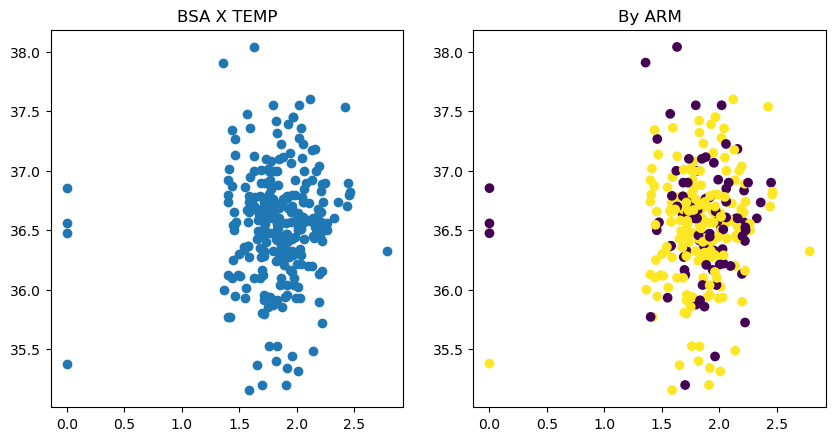

In [61]:
#StandardFeatureCompareScatterPlot(patientbsadf, patienttempdf, 'BSA X TEMP')
StandardFeatureCompareScatterPlot(patientbsadf, tdf, 'BSA X TEMP')

### DIABP Versus HR

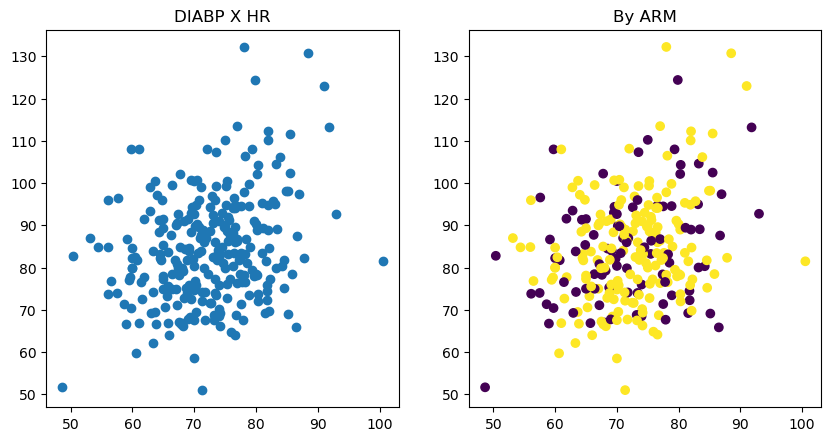

In [62]:
StandardFeatureCompareScatterPlot(patientdiabpdf, patienthrdf, 'DIABP X HR')

### DIABP Versus OXYSAT

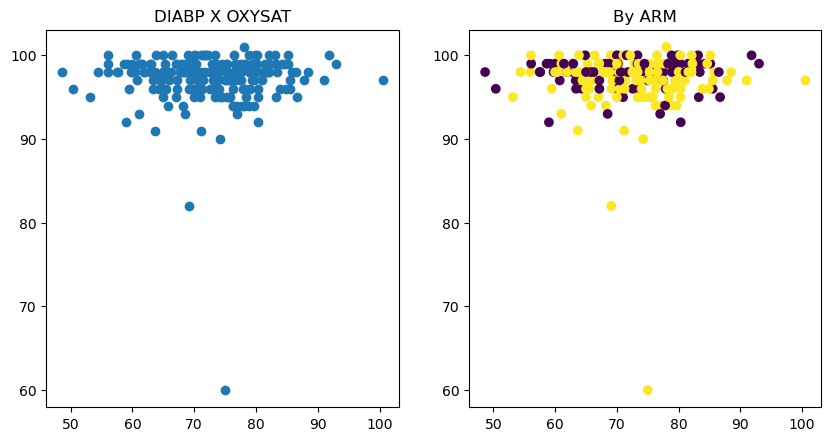

In [63]:
StandardFeatureCompareScatterPlot(patientdiabpdf, patientoxtysatdf, 'DIABP X OXYSAT')

### DIABP Versus RESP

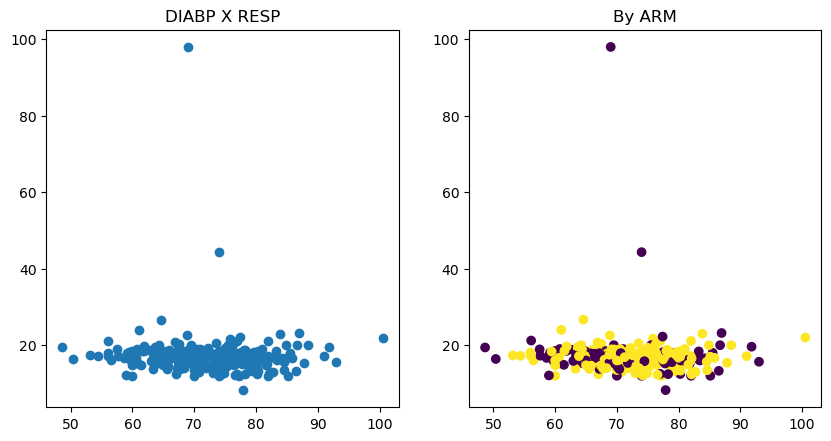

In [64]:
StandardFeatureCompareScatterPlot(patientdiabpdf, patientrespdf, 'DIABP X RESP')

### DIABP Versus SYSBP

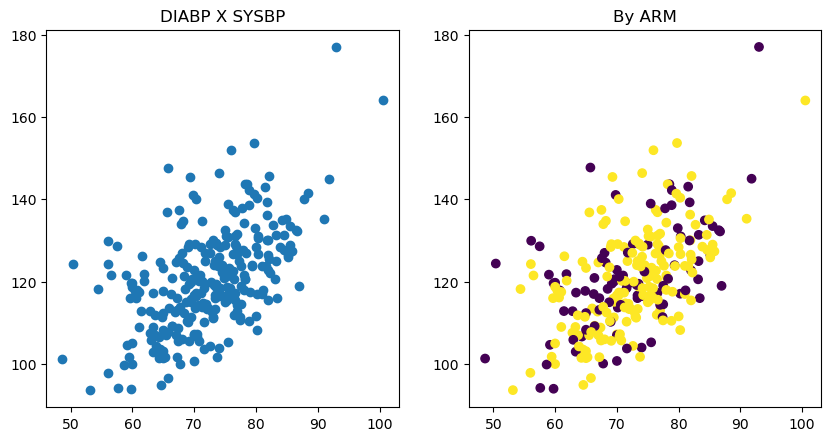

In [65]:
StandardFeatureCompareScatterPlot(patientdiabpdf, patientsysbpdf, 'DIABP X SYSBP')

### DIABP Versus TEMP

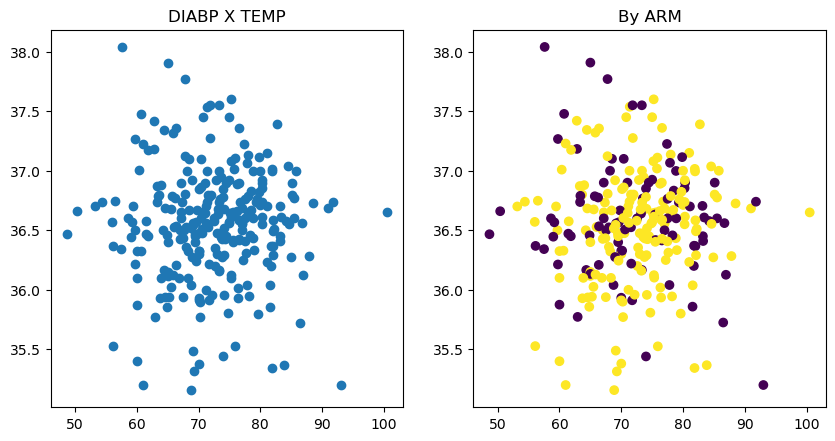

In [66]:
# StandardFeatureCompareScatterPlot(patientdiabpdf, patienttempdf, 'DIABP X TEMP')
StandardFeatureCompareScatterPlot(patientdiabpdf, tdf, 'DIABP X TEMP')

### HR Versus OXYSAT

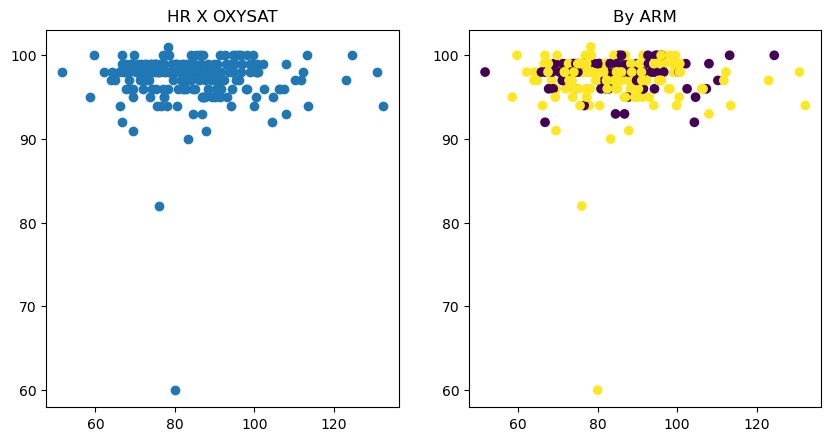

In [67]:
StandardFeatureCompareScatterPlot(patienthrdf, patientoxtysatdf, 'HR X OXYSAT')

### HR Versus RESP

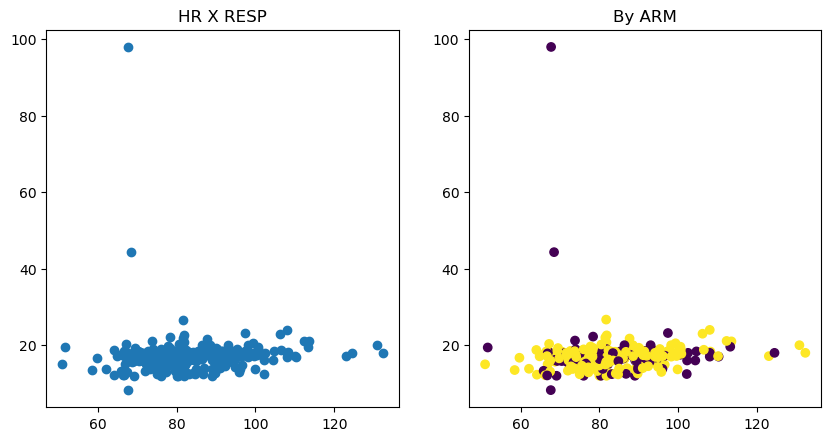

In [68]:
StandardFeatureCompareScatterPlot(patienthrdf, patientrespdf, 'HR X RESP')

### HR Versus SYSBP

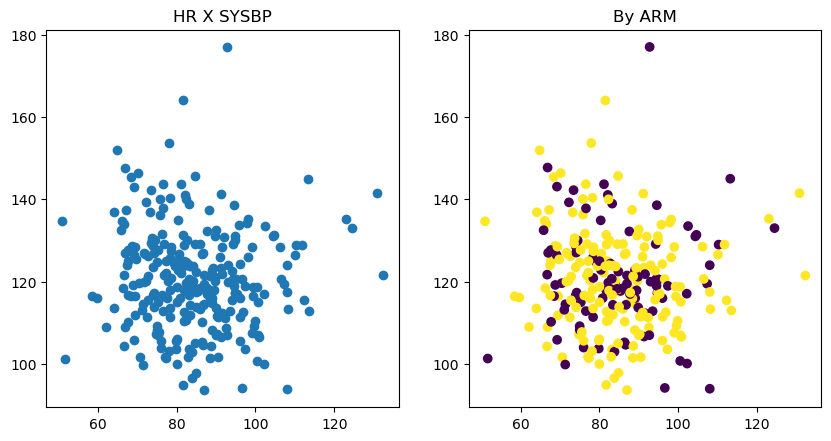

In [69]:
StandardFeatureCompareScatterPlot(patienthrdf, patientsysbpdf, 'HR X SYSBP')

### HR Versus TEMP

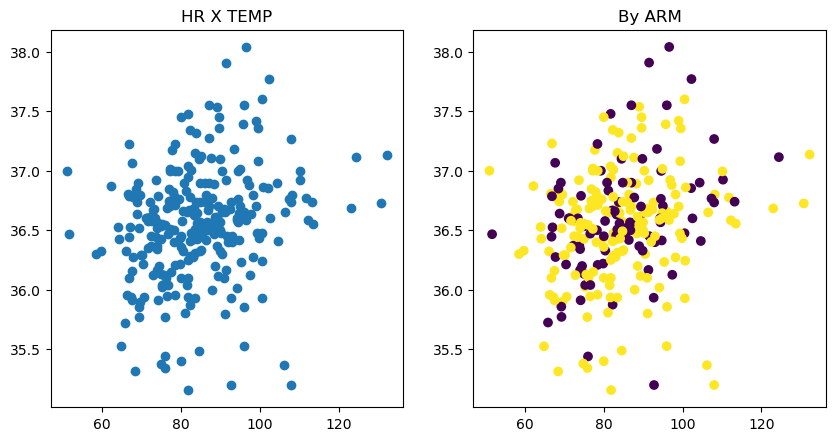

In [70]:
# StandardFeatureCompareScatterPlot(patienthrdf, patienttempdf, 'HR X TEMP')
StandardFeatureCompareScatterPlot(patienthrdf, tdf, 'HR X TEMP')

### OXYSAT Versus RESP

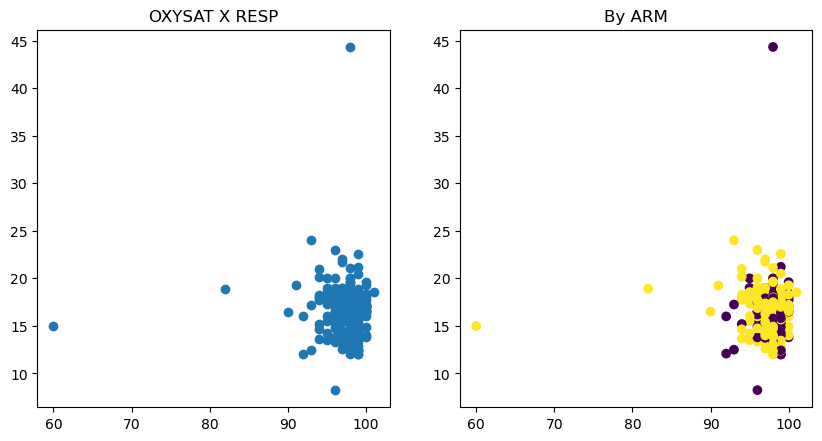

In [71]:
StandardFeatureCompareScatterPlot(patientoxtysatdf, patientrespdf, 'OXYSAT X RESP')

### OXYSAT Versus SYSBP

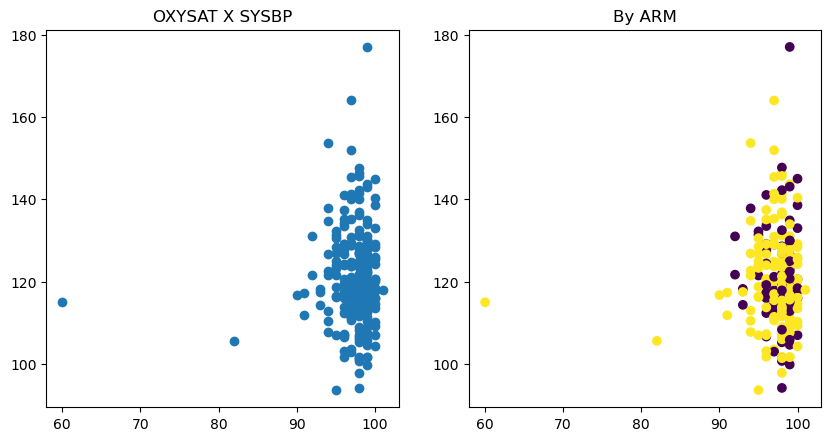

In [72]:
StandardFeatureCompareScatterPlot(patientoxtysatdf, patientsysbpdf, 'OXYSAT X SYSBP')

### OXYSAT Versus TEMP

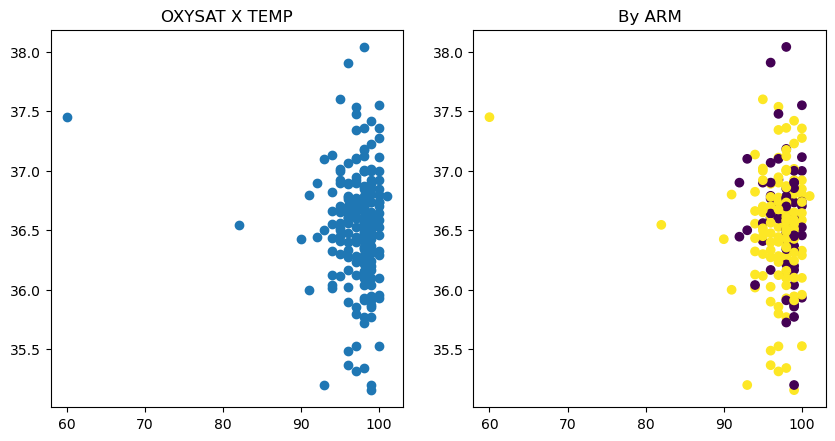

In [73]:
# StandardFeatureCompareScatterPlot(patientoxtysatdf, patienttempdf, 'OXYSAT X TEMP')
StandardFeatureCompareScatterPlot(patientoxtysatdf, tdf, 'OXYSAT X TEMP')

### RESP Versus SYSBP

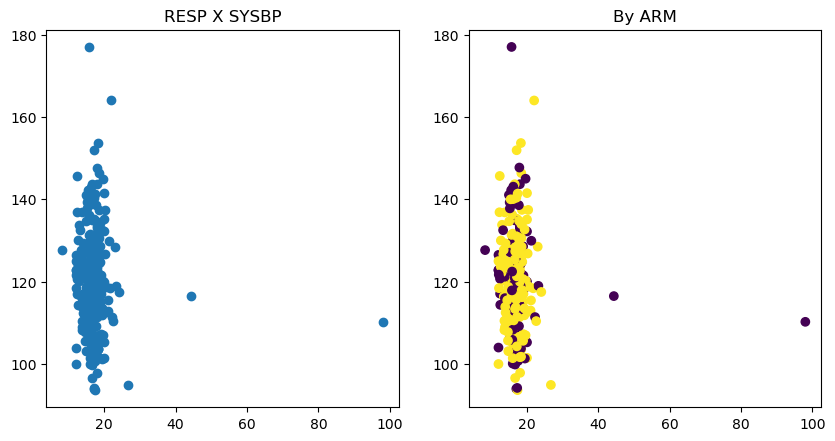

In [74]:
StandardFeatureCompareScatterPlot(patientrespdf, patientsysbpdf, 'RESP X SYSBP')

### RESP Versus TEMP

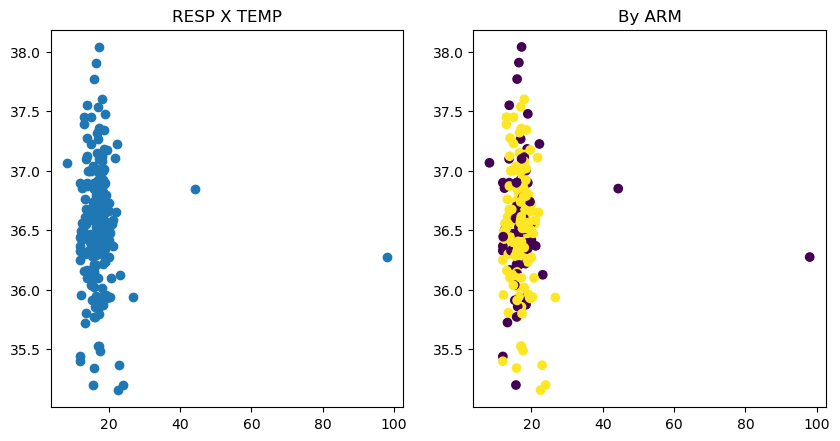

In [75]:
# StandardFeatureCompareScatterPlot(patientrespdf, patienttempdf, 'RESP X TEMP')
StandardFeatureCompareScatterPlot(patientrespdf, tdf, 'RESP X TEMP')

### SYSBP Versus TEMP

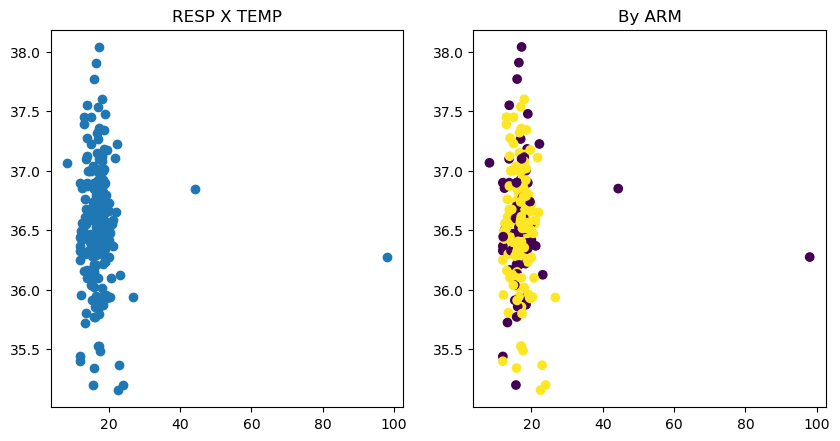

In [76]:
# StandardFeatureCompareScatterPlot(patientrespdf, patienttempdf, 'RESP X TEMP')
StandardFeatureCompareScatterPlot(patientrespdf, tdf, 'RESP X TEMP')

In [77]:
patienttempdf[patienttempdf['VSORRESU']=='F'].shape

(283, 21)

## Labs?

## Adverse Events?

In [78]:
conn = pyodbc.connect('DRIVER={SQL Server};Server=10.10.10.203;Database=sfls1_data;user=CDR_IIS_Account;password=eclinical.1;Trusted_Connection=false')
sql = 'select * from [Clintek_010].[AE]'
clintek10DMae = pd.read_sql(sql, conn)

In [79]:
notunrelatedaes = clintek10DMae[~clintek10DMae.AEREL.eq('NOT RELATED')]
notunrelatedaes.shape

(2692, 39)

In [80]:
dfdm1 = clintek10DMdf[['USUBJID', 'ARM', 'SEX', 'AGE', 'RACE']]
dfdm1["CONDITION"] = ""

In [81]:
wk = pd.merge(dfdm1, notunrelatedaes, on="USUBJID", how='inner')

In [82]:
wk1 = pd.pivot_table(wk, values='USUBJID', index=['AEBODSYS', 'AEDECOD'], columns=['ARM'], aggfunc=lambda x:x.nunique())

In [83]:
wk1.head(20)

ARM                                                                COHORT 1  \
AEBODSYS                             AEDECOD                                  
Blood and lymphatic system disorders Anaemia                           36.0   
                                     Febrile neutropenia                4.0   
                                     Leukopenia                         7.0   
                                     Lymphocytosis                      NaN   
                                     Lymphopenia                        4.0   
                                     Neutropenia                       30.0   
                                     Pancytopenia                       4.0   
                                     Thrombocytopenia                  63.0   
Cardiac disorders                    Angina pectoris                    1.0   
                                     Atrial fibrillation                1.0   
                                     Cardiac failure                    2.0   
                                     Cardiac failure congestive         NaN   
                                     Myocardial infarction              1.0   
                                     Sinus tachycardia                  1.0   
                                     Supraventricular tachycardia       1.0   
                                     Tachycardia                        2.0   
Ear and labyrinth disorders          Deafness                           NaN   
                                     Deafness bilateral                 1.0   
                                     Ear congestion                     1.0   
                                     Ear discomfort                     NaN   

ARM                                                                COHORT 2  
AEBODSYS                             AEDECOD                                 
Blood and lymphatic system disorders Anaemia                           55.0  
                                     Febrile neutropenia                5.0  
                                     Leukopenia                        13.0  
                                     Lymphocytosis                      1.0  
                                     Lymphopenia                        5.0  
                                     Neutropenia                       51.0  
                                     Pancytopenia                       1.0  
                                     Thrombocytopenia                  86.0  
Cardiac disorders                    Angina pectoris                    NaN  
                                     Atrial fibrillation                NaN  
                                     Cardiac failure                    NaN  
                                     Cardiac failure congestive         1.0  
                                     Myocardial infarction              NaN  
                                     Sinus tachycardia                  3.0  
                                     Supraventricular tachycardia       NaN  
                                     Tachycardia                        1.0  
Ear and labyrinth disorders          Deafness                           1.0  
                                     Deafness bilateral                 NaN  
                                     Ear congestion                     NaN  
                                     Ear discomfort                     1.0

In [84]:
wk1.reset_index(inplace=True)
wk1.sort_values(by=['AEBODSYS', 'COHORT 1'], ascending=[True, False], inplace=True)
wk1.set_index(['AEBODSYS','AEDECOD'], inplace=True)
wk1.head(15)

ARM                                                                COHORT 1  \
AEBODSYS                             AEDECOD                                  
Blood and lymphatic system disorders Thrombocytopenia                  63.0   
                                     Anaemia                           36.0   
                                     Neutropenia                       30.0   
                                     Leukopenia                         7.0   
                                     Febrile neutropenia                4.0   
                                     Lymphopenia                        4.0   
                                     Pancytopenia                       4.0   
                                     Lymphocytosis                      NaN   
Cardiac disorders                    Cardiac failure                    2.0   
                                     Tachycardia                        2.0   
                                     Angina pectoris                    1.0   
                                     Atrial fibrillation                1.0   
                                     Myocardial infarction              1.0   
                                     Sinus tachycardia                  1.0   
                                     Supraventricular tachycardia       1.0   

ARM                                                                COHORT 2  
AEBODSYS                             AEDECOD                                 
Blood and lymphatic system disorders Thrombocytopenia                  86.0  
                                     Anaemia                           55.0  
                                     Neutropenia                       51.0  
                                     Leukopenia                        13.0  
                                     Febrile neutropenia                5.0  
                                     Lymphopenia                        5.0  
                                     Pancytopenia                       1.0  
                                     Lymphocytosis                      1.0  
Cardiac disorders                    Cardiac failure                    NaN  
                                     Tachycardia                        1.0  
                                     Angina pectoris                    NaN  
                                     Atrial fibrillation                NaN  
                                     Myocardial infarction              NaN  
                                     Sinus tachycardia                  3.0  
                                     Supraventricular tachycardia       NaN

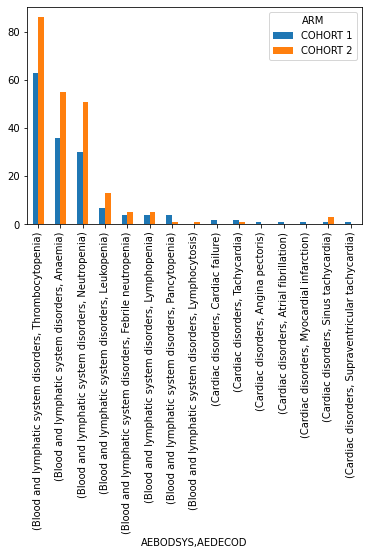

In [85]:
wk1.iloc[0:15].plot.bar()

In [93]:
wk2 = pd.pivot_table(wk, index=['AEBODSYS', 'AEDECOD'], columns=['CONDITION'],values=["USUBJID", "AGE", "RACE","SEX"], aggfunc=lambda x:x.nunique() )
wk2.reset_index(inplace=True)
wk2.sort_values(by=['AEBODSYS', 'USUBJID'], ascending=[True, False], inplace=True)
wk2.set_index(['AEBODSYS','AEDECOD'], inplace=True)
wk2.head(15)

AGE RACE SEX  \
CONDITION                                                                      
AEBODSYS                             AEDECOD                                   
Blood and lymphatic system disorders Thrombocytopenia            46    4   2   
                                     Anaemia                     37    4   2   
                                     Neutropenia                 39    5   2   
                                     Leukopenia                  16    3   2   
                                     Febrile neutropenia          8    3   2   
                                     Lymphopenia                  9    2   2   
                                     Pancytopenia                 4    1   2   
                                     Lymphocytosis                1    1   1   
Cardiac disorders                    Sinus tachycardia            4    2   1   
                                     Tachycardia                  3    1   2   
                                     Cardiac failure              2    1   1   
                                     Angina pectoris              1    1   1   
                                     Atrial fibrillation          1    1   1   
                                     Cardiac failure congestive   1    1   1   
                                     Myocardial infarction        1    1   1   

                                                                USUBJID  
CONDITION                                                                
AEBODSYS                             AEDECOD                             
Blood and lymphatic system disorders Thrombocytopenia               149  
                                     Anaemia                         91  
                                     Neutropenia                     81  
                                     Leukopenia                      20  
                                     Febrile neutropenia              9  
                                     Lymphopenia                      9  
                                     Pancytopenia                     5  
                                     Lymphocytosis                    1  
Cardiac disorders                    Sinus tachycardia                4  
                                     Tachycardia                      3  
                                     Cardiac failure                  2  
                                     Angina pectoris                  1  
                                     Atrial fibrillation              1  
                                     Cardiac failure congestive       1  
                                     Myocardial infarction            1

In [96]:
nuae = wk2[wk2.USUBJID >= 3]


In [101]:
print(nuae.shape)
print(nuae.head(15))
print(f"There are {wk.AGE.nunique()} distinct Ages in this dataset")
print(f"There are {wk.RACE.nunique()} distinct Races in this dataset")
print(f"There are {wk.SEX.nunique()} distinct Sexes in this dataset")
print(f"There are {wk.USUBJID.nunique()} Subjects in this dataset")


(80, 4)
                                                         AGE RACE SEX USUBJID
CONDITION                                                                    
AEBODSYS                             AEDECOD                                 
Blood and lymphatic system disorders Thrombocytopenia     46    4   2     149
                                     Anaemia              37    4   2      91
                                     Neutropenia          39    5   2      81
                                     Leukopenia           16    3   2      20
                                     Febrile neutropenia   8    3   2       9
                                     Lymphopenia           9    2   2       9
                                     Pancytopenia          4    1   2       5
Cardiac disorders                    Sinus tachycardia     4    2   1       4
                                     Tachycardia           3    1   2       3
Eye disorders                        Vision blurred     

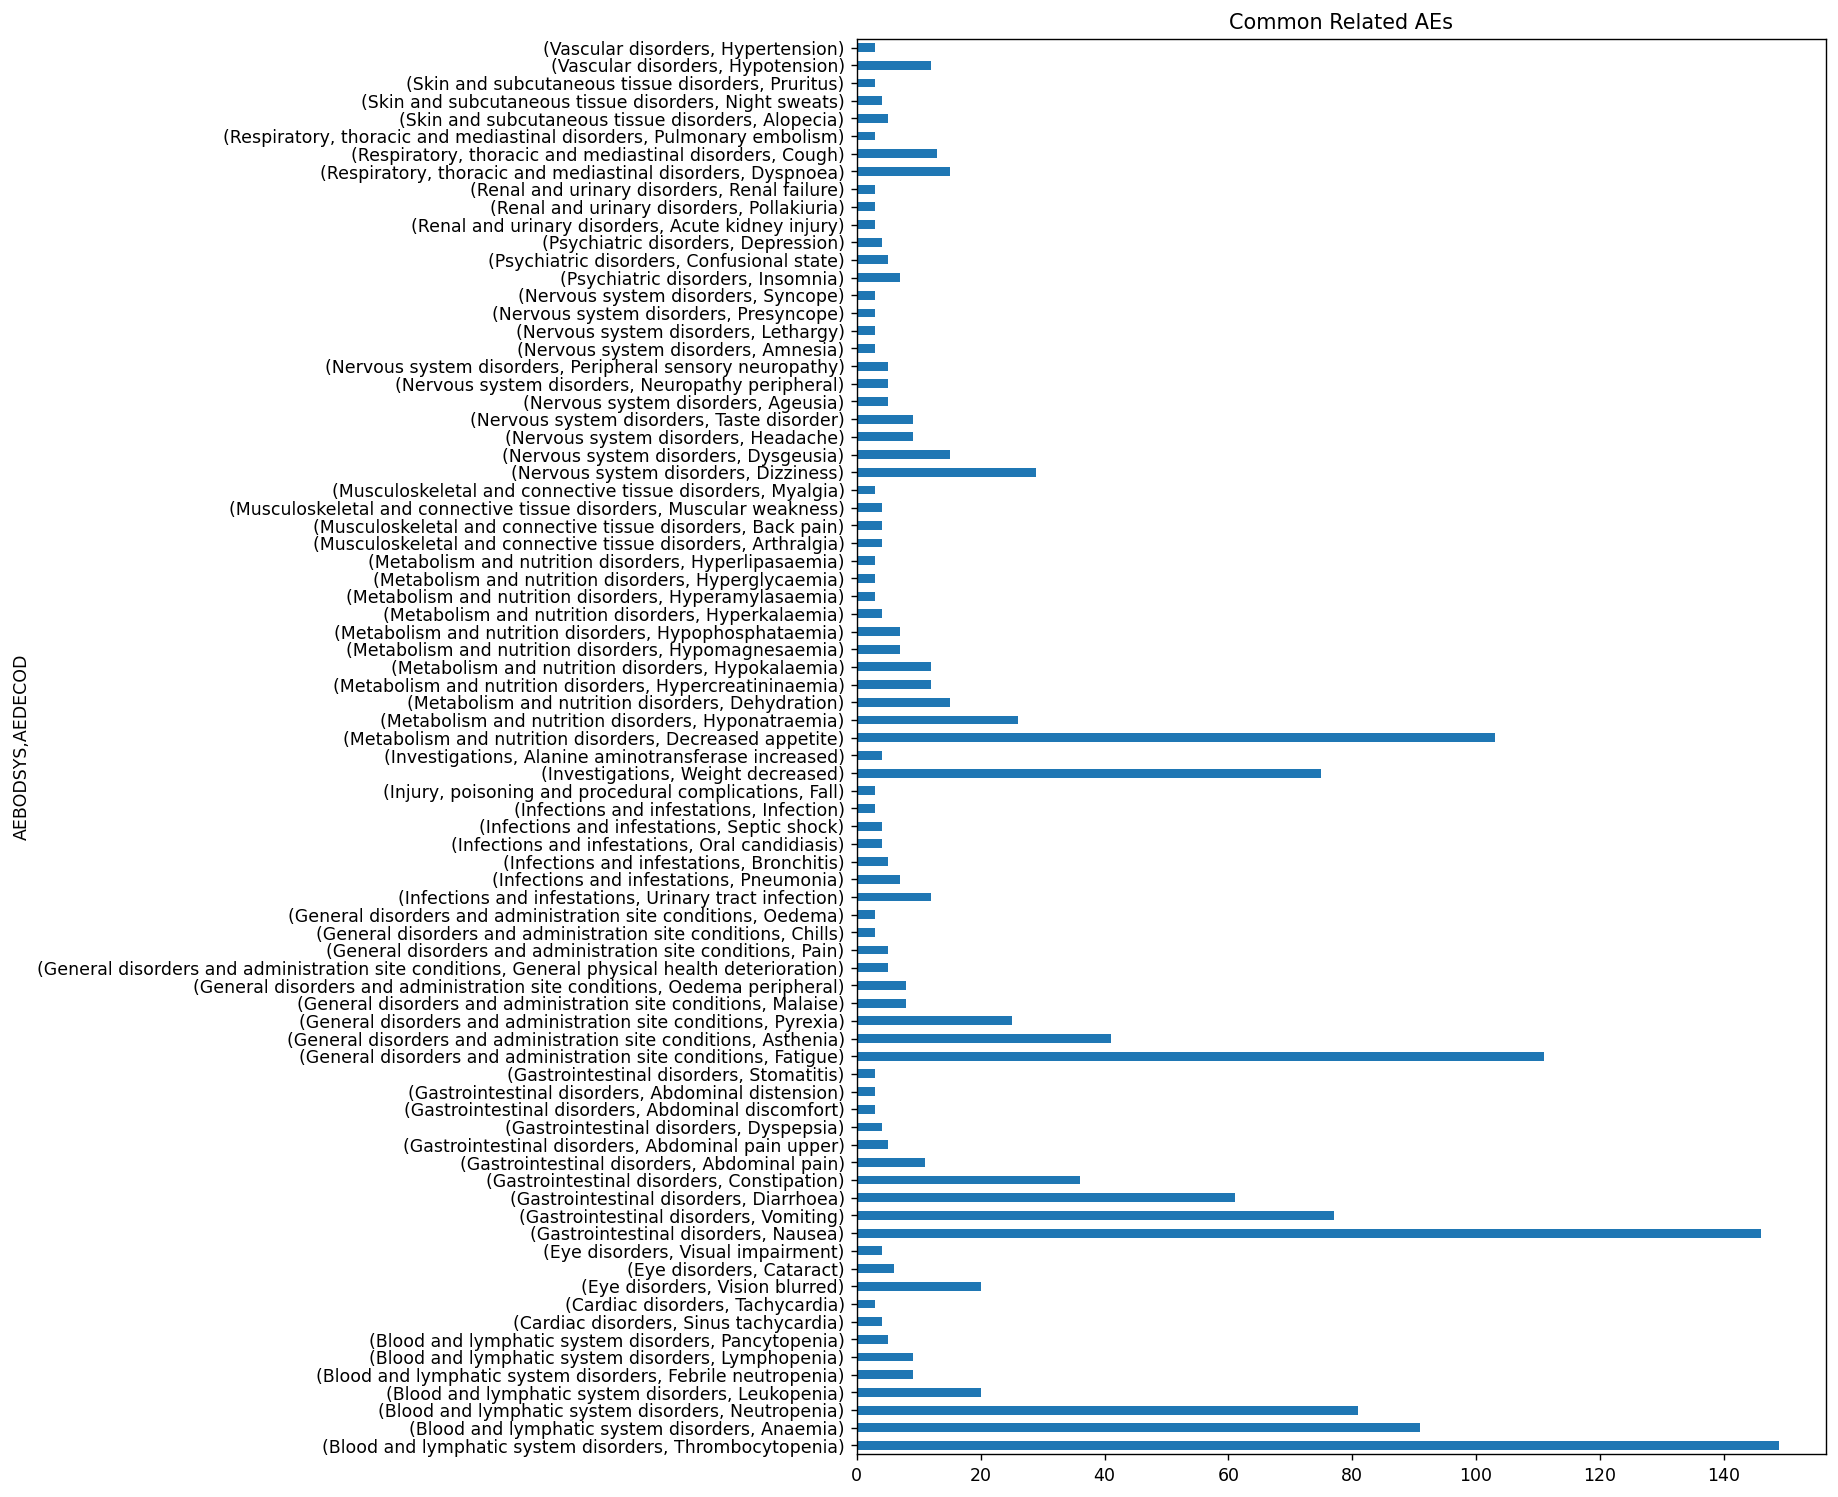

In [113]:
fig1, (ax1) = plt.subplots(1, 1, figsize=(10,15))
fig1.dpi=125
ax1.set_title('Common Related AEs')
nuae['USUBJID'].plot.barh(ax=ax1)

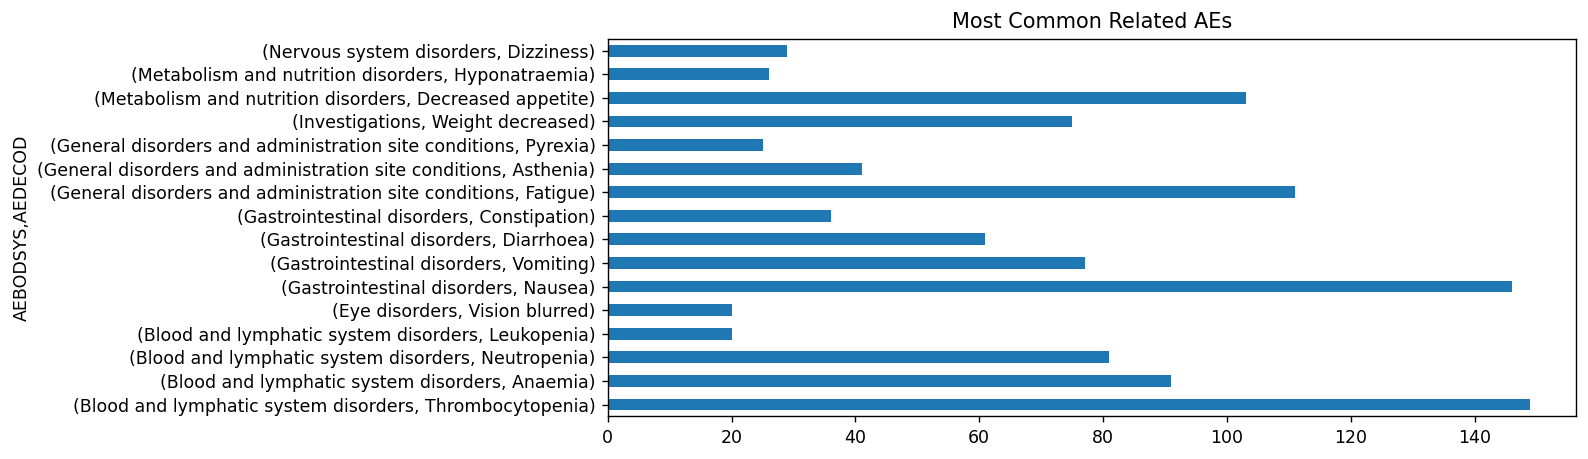

In [111]:
mostcommonnuae = wk2[wk2.USUBJID >= 20]
fig1, (ax1) = plt.subplots(1, 1, figsize=(10,4))
fig1.dpi=125
ax1.set_title('Most Common Related AEs')
mostcommonnuae['USUBJID'].plot.barh(ax=ax1)

In [126]:
# mostcommonnuae.iloc[0]
# mostcommonnuae.loc[['Blood and lymphatic system disorders','Thrombocytopenia']]
mostcommonnuae.loc['Blood and lymphatic system disorders', 'Thrombocytopenia']

         CONDITION
AGE                    46
RACE                    4
SEX                     2
USUBJID               149
Name: (Blood and lymphatic system disorders, Thrombocytopenia), dtype: int64

## Some medical History Data Sets

In [127]:
sql = "select USUBJID, MHDECOD from [sfls1_data].[Clintek_010].[MH] where [MHENRF] = 'ONGOING' and MHDECOD = 'Diabetes mellitus'"
diabeticsdf = pd.read_sql(sql, conn)

In [135]:
aefordiabetisdf = pd.merge(wk, diabeticsdf, on="USUBJID", how='left')

In [138]:
ae4ddf = pd.pivot_table(aefordiabetisdf, index=['AEBODSYS', 'AEDECOD'], columns=['CONDITION'],values=["USUBJID", "AGE", "RACE","SEX", "MHDECOD"], aggfunc=lambda x:x.nunique() )
ae4ddf.reset_index(inplace=True)
ae4ddf.sort_values(by=['AEBODSYS', 'USUBJID'], ascending=[True, False], inplace=True)
ae4ddf.set_index(['AEBODSYS','AEDECOD'], inplace=True)
ae4ddf.head(15)

AGE MHDECOD  \
CONDITION                                                                     
AEBODSYS                             AEDECOD                                  
Blood and lymphatic system disorders Thrombocytopenia            46       1   
                                     Anaemia                     37       1   
                                     Neutropenia                 39       1   
                                     Leukopenia                  16       1   
                                     Febrile neutropenia          8       0   
                                     Lymphopenia                  9       0   
                                     Pancytopenia                 4       0   
                                     Lymphocytosis                1       0   
Cardiac disorders                    Sinus tachycardia            4       0   
                                     Tachycardia                  3       0   
                                     Cardiac failure              2       0   
                                     Angina pectoris              1       0   
                                     Atrial fibrillation          1       0   
                                     Cardiac failure congestive   1       0   
                                     Myocardial infarction        1       0   

                                                                RACE SEX  \
CONDITION                                                                  
AEBODSYS                             AEDECOD                               
Blood and lymphatic system disorders Thrombocytopenia              4   2   
                                     Anaemia                       4   2   
                                     Neutropenia                   5   2   
                                     Leukopenia                    3   2   
                                     Febrile neutropenia           3   2   
                                     Lymphopenia                   2   2   
                                     Pancytopenia                  1   2   
                                     Lymphocytosis                 1   1   
Cardiac disorders                    Sinus tachycardia             2   1   
                                     Tachycardia                   1   2   
                                     Cardiac failure               1   1   
                                     Angina pectoris               1   1   
                                     Atrial fibrillation           1   1   
                                     Cardiac failure congestive    1   1   
                                     Myocardial infarction         1   1   

                                                                USUBJID  
CONDITION                                                                
AEBODSYS                             AEDECOD                             
Blood and lymphatic system disorders Thrombocytopenia               149  
                                     Anaemia                         91  
                                     Neutropenia                     81  
                                     Leukopenia                      20  
                                     Febrile neutropenia              9  
                                     Lymphopenia                      9  
                                     Pancytopenia                     5  
                                     Lymphocytosis                    1  
Cardiac disorders                    Sinus tachycardia                4  
                                     Tachycardia                      3  
                                     Cardiac failure                  2  
                                     Angina pectoris                  1  
                                     Atrial fibrillation              1  
                                     Cardiac failure congestive       1  
              

In [144]:
aedbsdf = aefordiabetisdf[(aefordiabetisdf.MHDECOD.eq('Diabetes mellitus') & aefordiabetisdf.AEDECOD.eq('Thrombocytopenia'))]

In [154]:
patientswith = aedbsdf.shape[0] # diabetis
patientsaecount = mostcommonnuae.loc['Blood and lymphatic system disorders', 'Thrombocytopenia'].USUBJID[0]
print(f'There are {patientswith} patients with Diabetis that has an AE of Thrombocytopenia out of {patientsaecount} reporting this AE {patientswith / patientsaecount * 100}%')

There are 18 patients with Diabetis that has an AE of Thrombocytopenia out of 149 reporting this AE 12.080536912751679%


In [161]:
# would this work betterr as a pie chart?
# aefordiabetisdf
X = aefordiabetisdf[(aefordiabetisdf.AEDECOD.eq('Thrombocytopenia'))].USUBJID
Y = aefordiabetisdf[(aefordiabetisdf.MHDECOD.eq('Diabetes mellitus') & aefordiabetisdf.AEDECOD.eq('Thrombocytopenia'))].USUBJID
x1 = X.nunique()
y1 = Y.nunique()
print (x1)
print(y1)

149
8


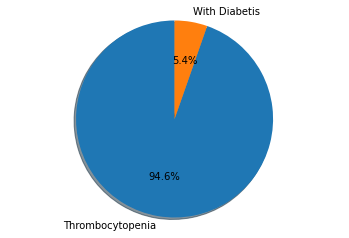

In [175]:
labels = 'Thrombocytopenia', 'With Diabetis'
foo = x1 - y1
sizes = [foo, y1]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
# print(y1/foo)

In [176]:
sql = "select * from [sfls1_data].[Clintek_010].[TU]"
tudf = pd.read_sql(sql, conn)

DatabaseError: Execution failed on sql: select * from [sfls1_data].[Clintek_010].[TU]
('01000', '[01000] [Microsoft][ODBC SQL Server Driver][DBNETLIB]ConnectionWrite (send()). (10054) (SQLExecDirectW); [01000] [Microsoft][ODBC SQL Server Driver][DBNETLIB]General network error. Check your network documentation. (11)')
unable to rollback